In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [4]:
df_init = pd.read_csv("data/lof/data-lof-2024-04-01.csv")
df = pd.read_csv("data/inc/data-inc-2024-04-07.csv")

In [5]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77455 entries, 0 to 77454
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        77455 non-null  float64
 1   id_mls                    77455 non-null  object 
 2   bathrooms_total           77455 non-null  float64
 3   bedrooms_extra            77455 non-null  float64
 4   bedrooms                  77455 non-null  float64
 5   stories_total             77455 non-null  float64
 6   size_interior             77455 non-null  float64
 7   building_type             77455 non-null  object 
 8   agency_name               77455 non-null  object 
 9   agency_type               77455 non-null  object 
 10  property_type             77455 non-null  object 
 11  lng                       77455 non-null  float64
 12  lat                       77455 non-null  float64
 13  ownership_type            77455 non-null  object 
 14  owners

# First Glance

In [6]:
df.head()

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26718475,24007199,4,4 + 1,2.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,...,42.244691,Freehold,1,69X226,0,https://realtor.ca/real-estate/26718475/4355-c...,638481785152970000,N9G2B2,Ontario,1699900.0
1,26718474,24007200,0,0,2.0,NaN,Fourplex,DEERBROOK REALTY INC. - 175,Firm,Multi-family,...,42.322121,Freehold,1,39.99 X 146.21,0,https://realtor.ca/real-estate/26718474/247-la...,638481785150730000,N9A2E7,Ontario,649900.0
2,26718165,24007077,3,3 + 0,1.0,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,...,42.216566,Freehold,1,63.34X150.45'X 73.89' X 146.39',0,https://realtor.ca/real-estate/26718165/3792-s...,638481484406700000,N9H0G6,Ontario,1250000.0
3,26716904,24007178,0,0,2.0,NaN,Duplex,DAVENPORT REALTY,Firm,Multi-family,...,42.289987,Freehold,1,under 1/4 acre,0,https://realtor.ca/real-estate/26716904/3765-3...,638480378388500000,N9C1K1,Ontario,499000.0
4,26715139,40564708,2,5,2.0,1400.0000,Duplex,Davenport Realty Brokerage,Firm,Multi-family,...,42.290064,Freehold,1,under 1/2 acre,0,https://realtor.ca/real-estate/26715139/3765-3...,638480098172200000,N9C1K1,Ontario,499000.0


In [7]:
df.shape

(25166, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25166 entries, 0 to 25165
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        25166 non-null  int64  
 1   id_mls                    25166 non-null  object 
 2   bathrooms_total           25166 non-null  int64  
 3   bedrooms                  25166 non-null  object 
 4   stories_total             16182 non-null  float64
 5   size_interior             13779 non-null  object 
 6   building_type             25166 non-null  object 
 7   agency_name               25166 non-null  object 
 8   agency_type               25166 non-null  object 
 9   property_type             25166 non-null  object 
 10  lng                       25166 non-null  float64
 11  lat                       25166 non-null  float64
 12  ownership_type            25166 non-null  object 
 13  ownership_type_group_ids  25166 non-null  object 
 14  land_s

In [9]:
df_with_size = df[df["size_interior"].notna()]
df_with_size

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
4,26715139,40564708,2,5,2.0,1400.0000,Duplex,Davenport Realty Brokerage,Firm,Multi-family,...,42.290064,Freehold,1,under 1/2 acre,0,https://realtor.ca/real-estate/26715139/3765-3...,638480098172200000,N9C1K1,Ontario,499000.0
7,26713829,24007159,4,1 + 4,2.0,2700.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,Single Family,...,42.274267,Freehold,1,50X114,0,https://realtor.ca/real-estate/26713829/2435-r...,638479480512330000,N9E2Z7,Ontario,1199000.0
13,26712602,24007150,2,2 + 0,NaN,1129.0000,Apartment,THE SIGNATURE GROUP REALTY INC,Firm,Single Family,...,42.236292,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26712602/2550-s...,638479408513270000,N9H2R6,Ontario,529999.0
28,26707340,24007054,2,2 + 0,NaN,1525.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.248917,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26707340/5840-n...,638478580675170000,N0J0E3,Ontario,549900.0
37,26704785,24006936,3,3 + 0,2.5,1534.0000,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,...,42.323537,Freehold,1,30X115,0,https://realtor.ca/real-estate/26704785/315-gl...,638478436849700000,N9A2P6,Ontario,429900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161,26691527,5731,2,3,NaN,2140 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.450687,none,none,14575,0,https://realtor.ca/real-estate/26691527/155-ri...,638476752215900000,NaN,Northwest Territories,875000.0
25162,26691140,5730,2,3,NaN,1369 sqft,Row / Townhouse,RE/MAX North of 60,Firm,Single Family,...,62.441894,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26691140/25-705...,638476715929770000,X1A3W9,Northwest Territories,409900.0
25163,26689306,5728,3,4,NaN,1668 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.443042,none,none,6179,0,https://realtor.ca/real-estate/26689306/507-kn...,638476548319100000,X1A2Y5,Northwest Territories,629900.0
25164,26686534,5727,3,4,NaN,2900 sqft,House,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.465253,none,none,5554,0,https://realtor.ca/real-estate/26686534/209-ni...,638475832164600000,NaN,Northwest Territories,824900.0


In [10]:
df_with_size["province"].value_counts()

province
British Columbia           4403
Ontario                    3388
Alberta                    2693
Quebec                     1623
Manitoba                    616
Saskatchewan                579
New Brunswick               330
Newfoundland & Labrador     113
Yukon                        20
Northwest Territories        14
Name: count, dtype: int64

In [11]:
df["province"].value_counts()

province
Ontario                    11387
British Columbia            4740
Quebec                      3597
Alberta                     2854
Manitoba                     688
Saskatchewan                 650
Nova Scotia                  537
New Brunswick                433
Newfoundland & Labrador      137
Prince Edward Island         109
Yukon                         20
Northwest Territories         14
Name: count, dtype: int64

In [12]:
np.round(df.describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,25166.0,25166.0,16182.0,25166.0,25166.0,25166.0,2.516600e+04,25166.0
mean,26702064.0,2.0,2.0,-91.0,47.0,2.0,6.384781e+17,882234.0
std,9416.0,1.0,5.0,20.0,3.0,5.0,1.391140e+12,1015339.0
min,26685201.0,0.0,1.0,-139.0,42.0,0.0,6.384750e+17,1.0
25%,26693976.0,1.0,1.0,-114.0,44.0,0.0,6.384769e+17,425000.0
50%,26702152.0,2.0,2.0,-80.0,46.0,1.0,6.384779e+17,659900.0
75%,26710186.0,3.0,2.0,-78.0,49.0,4.0,6.384792e+17,999000.0
max,26718602.0,31.0,345.0,-53.0,64.0,486.0,6.384818e+17,39500000.0


# Remove Duplicates

In [13]:
len(df["id"].unique())

25145

In [14]:
ids = df["id"]
print(df[ids.isin(ids[ids.duplicated()])].sort_values("id").shape[0])
df[ids.isin(ids[ids.duplicated()])].sort_values("id")

42


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
24619,26686689,E4379628,4,3,2.0,196.63 m2,House,RE/MAX Excellence,Firm,Single Family,...,53.515778,Freehold,1,569.2 m2,0,https://realtor.ca/real-estate/26686689/372-no...,638475868098530000,T8A5T9,Alberta,559000.0
24618,26686689,E4379628,4,3,2.0,196.63 m2,House,RE/MAX Excellence,Firm,Single Family,...,53.515778,Freehold,1,569.2 m2,0,https://realtor.ca/real-estate/26686689/372-no...,638475868098530000,T8A5T9,Alberta,559000.0
6980,26689051,W8188078,2,2,NaN,NaN,Apartment,JUSTO INC.,Firm,Single Family,...,43.612860,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26689051/205-25...,638476251401370000,L4Z3K9,Ontario,539999.0
6982,26689051,W8188078,2,2,NaN,NaN,Apartment,JUSTO INC.,Firm,Single Family,...,43.612860,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26689051/205-25...,638476251401370000,L4Z3K9,Ontario,539999.0
16227,26693463,957869,3,5,NaN,2609 sqft,House,Macdonald Realty Victoria,Firm,Single Family,...,48.455027,Freehold,1,7405 sqft,5,https://realtor.ca/real-estate/26693463/2949-c...,638476838552230000,V9B5T9,British Columbia,965000.0
16226,26693463,957869,3,5,NaN,2609 sqft,House,Macdonald Realty Victoria,Firm,Single Family,...,48.455027,Freehold,1,7405 sqft,5,https://realtor.ca/real-estate/26693463/2949-c...,638476838552230000,V9B5T9,British Columbia,965000.0
24419,26696334,E4379912,3,3,2.0,164.1 m2,House,RE/MAX Excellence,Firm,Single Family,...,53.527679,Freehold,1,492.85 m2,0,https://realtor.ca/real-estate/26696334/20829-...,638477164136070000,T5T3Z1,Alberta,509900.0
24417,26696334,E4379912,3,3,2.0,164.1 m2,House,RE/MAX Excellence,Firm,Single Family,...,53.527679,Freehold,1,492.85 m2,0,https://realtor.ca/real-estate/26696334/20829-...,638477164136070000,T5T3Z1,Alberta,509900.0
24420,26696335,E4379913,4,5,NaN,222.69 m2,Duplex,MaxWell Devonshire Realty,Firm,Single Family,...,53.512081,Freehold,1,404.16 m2,6,https://realtor.ca/real-estate/26696335/9825-9...,638477164137730000,T6E1K6,Alberta,839900.0
24418,26696335,E4379913,4,5,NaN,222.69 m2,Duplex,MaxWell Devonshire Realty,Firm,Single Family,...,53.512081,Freehold,1,404.16 m2,6,https://realtor.ca/real-estate/26696335/9825-9...,638477164137730000,T6E1K6,Alberta,839900.0


In [15]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
24619,26686689,E4379628,4,3,2.0,196.63 m2,House,RE/MAX Excellence,Firm,Single Family,...,53.515778,Freehold,1,569.2 m2,0,https://realtor.ca/real-estate/26686689/372-no...,638475868098530000,T8A5T9,Alberta,559000.0
6982,26689051,W8188078,2,2,NaN,NaN,Apartment,JUSTO INC.,Firm,Single Family,...,43.612860,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26689051/205-25...,638476251401370000,L4Z3K9,Ontario,539999.0
16227,26693463,957869,3,5,NaN,2609 sqft,House,Macdonald Realty Victoria,Firm,Single Family,...,48.455027,Freehold,1,7405 sqft,5,https://realtor.ca/real-estate/26693463/2949-c...,638476838552230000,V9B5T9,British Columbia,965000.0
24419,26696334,E4379912,3,3,2.0,164.1 m2,House,RE/MAX Excellence,Firm,Single Family,...,53.527679,Freehold,1,492.85 m2,0,https://realtor.ca/real-estate/26696334/20829-...,638477164136070000,T5T3Z1,Alberta,509900.0
24420,26696335,E4379913,4,5,NaN,222.69 m2,Duplex,MaxWell Devonshire Realty,Firm,Single Family,...,53.512081,Freehold,1,404.16 m2,6,https://realtor.ca/real-estate/26696335/9825-9...,638477164137730000,T6E1K6,Alberta,839900.0
2209,26698494,40565427,1,1 + 0,1.0,350.0000,Mobile Home,Your Hometown Realty Ltd,Firm,Single Family,...,43.756300,Leasehold,4,under 1/2 acre,0,https://realtor.ca/real-estate/26698494/611-oa...,638477615423070000,N1M2W5,Ontario,125000.0
17422,26699175,R2865654,2,3,NaN,1421 sqft,Row / Townhouse,Oakwyn Realty Ltd.,Firm,Single Family,...,49.273481,Strata,2,0,1,https://realtor.ca/real-estate/26699175/2j-103...,638477634813200000,V6Z3A3,British Columbia,1899990.0
18785,26700446,R2865847,1,2,NaN,1396 sqft,House,RE/MAX City Realty,Firm,Single Family,...,49.287140,Freehold,1,1.07 ac,0,https://realtor.ca/real-estate/26700446/7356-b...,638477707702800000,V5A1G1,British Columbia,3400000.0
17223,26702128,R2866150,1,2,NaN,800 sqft,Apartment,Oakwyn Realty Ltd.,Firm,Single Family,...,49.704170,Strata,2,0,0,https://realtor.ca/real-estate/26702128/519-38...,638477850997030000,V8B0J8,British Columbia,725000.0
8636,26703458,S8201348,1,2 + 0,1.0,NaN,House,RIGHT AT HOME REALTY,Firm,Single Family,...,44.600293,Freehold,1,41 x 116 FT,3,https://realtor.ca/real-estate/26703458/344-li...,638478338846830000,L3V2X1,Ontario,399000.0


In [16]:
df = df.drop_duplicates(subset="id", keep=False)

In [17]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [18]:
# df = df.drop(["id", "id_mls"], axis=1)

In [19]:
df.shape

(25124, 21)

# Data Preprocessing (Phase 1)

## Handling Property, Building & Ownership Types

### First Looks

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25124 entries, 0 to 25165
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        25124 non-null  int64  
 1   id_mls                    25124 non-null  object 
 2   bathrooms_total           25124 non-null  int64  
 3   bedrooms                  25124 non-null  object 
 4   stories_total             16168 non-null  float64
 5   size_interior             13759 non-null  object 
 6   building_type             25124 non-null  object 
 7   agency_name               25124 non-null  object 
 8   agency_type               25124 non-null  object 
 9   property_type             25124 non-null  object 
 10  lng                       25124 non-null  float64
 11  lat                       25124 non-null  float64
 12  ownership_type            25124 non-null  object 
 13  ownership_type_group_ids  25124 non-null  object 
 14  land_size  

In [21]:
df["ownership_type"].value_counts()

ownership_type
Freehold                  13971
Condominium/Strata         4006
none                       3946
Strata                     2146
Condominium                 595
Leasehold                   204
Freehold Condo               83
Undivided Co-ownership       49
Leasehold Condo/Strata       45
Shares in Co-operative       19
Unknown                      14
Other, See Remarks           13
Timeshare/Fractional         10
Life Lease                    9
Leasehold/Leased Land         8
Cooperative                   6
Name: count, dtype: int64

In [22]:
df["building_type"].value_counts()

building_type
House                         13991
Apartment                      4876
Row / Townhouse                2532
none                           1911
Duplex                          679
Mobile Home                     210
No Building                     155
Triplex                         134
Multi-Family                    114
Manufactured Home               100
Other                            94
Unknown                          88
Fourplex                         67
Recreational                     66
Manufactured Home/Mobile         58
Modular                          20
Parking                          10
Two Apartment House               9
Commercial Mix                    8
Residential Commercial Mix        2
Name: count, dtype: int64

In [23]:
df[df["building_type"] == "Other"]["ownership_type"].value_counts()

ownership_type
Freehold              65
none                  20
Condominium/Strata     5
Strata                 4
Name: count, dtype: int64

In [24]:
df[df["building_type"] == "Special Purpose"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [25]:
df["property_type"].value_counts()

property_type
Single Family    22773
Vacant Land       1810
Multi-family       343
Agriculture        124
Recreational        60
Parking             14
Name: count, dtype: int64

In [26]:
df[df["property_type"] == "Business"]["page_url"]

Series([], Name: page_url, dtype: object)

In [27]:
df[df["property_type"] == "Other"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [28]:
df[df["property_type"] == "Other"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        0 non-null      int64  
 1   id_mls                    0 non-null      object 
 2   bathrooms_total           0 non-null      int64  
 3   bedrooms                  0 non-null      object 
 4   stories_total             0 non-null      float64
 5   size_interior             0 non-null      object 
 6   building_type             0 non-null      object 
 7   agency_name               0 non-null      object 
 8   agency_type               0 non-null      object 
 9   property_type             0 non-null      object 
 10  lng                       0 non-null      float64
 11  lat                       0 non-null      float64
 12  ownership_type            0 non-null      object 
 13  ownership_type_group_ids  0 non-null      object 
 14  land_size                 0

### Property Type: Single Family

In [29]:
df_sf = df[df["property_type"] == "Single Family"]

In [30]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22773 entries, 0 to 25165
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        22773 non-null  int64  
 1   id_mls                    22773 non-null  object 
 2   bathrooms_total           22773 non-null  int64  
 3   bedrooms                  22773 non-null  object 
 4   stories_total             15879 non-null  float64
 5   size_interior             13494 non-null  object 
 6   building_type             22773 non-null  object 
 7   agency_name               22773 non-null  object 
 8   agency_type               22773 non-null  object 
 9   property_type             22773 non-null  object 
 10  lng                       22773 non-null  float64
 11  lat                       22773 non-null  float64
 12  ownership_type            22773 non-null  object 
 13  ownership_type_group_ids  22773 non-null  object 
 14  land_size  

In [31]:
df_sf["province"].value_counts()

province
Ontario                    10496
British Columbia            4359
Quebec                      3174
Alberta                     2666
Manitoba                     613
Saskatchewan                 576
Nova Scotia                  375
New Brunswick                308
Newfoundland & Labrador      105
Prince Edward Island          67
Yukon                         20
Northwest Territories         14
Name: count, dtype: int64

In [32]:
df_sf["building_type"].value_counts()

building_type
House                       13982
Apartment                    4866
Row / Townhouse              2531
Duplex                        566
none                          245
Mobile Home                   210
Triplex                       102
Manufactured Home             100
Manufactured Home/Mobile       58
Fourplex                       47
Recreational                   23
Modular                        20
Other                          12
Two Apartment House             9
Multi-Family                    2
Name: count, dtype: int64

In [33]:
df_sf["ownership_type"].value_counts()

ownership_type
Freehold                  12737
Condominium/Strata         3968
none                       2940
Strata                     2104
Condominium                 582
Leasehold                   195
Freehold Condo               83
Undivided Co-ownership       49
Leasehold Condo/Strata       45
Shares in Co-operative       15
Unknown                      12
Other, See Remarks           10
Timeshare/Fractional         10
Life Lease                    9
Leasehold/Leased Land         8
Cooperative                   6
Name: count, dtype: int64

In [34]:
df_sf[df_sf["ownership_type"] == "none"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
6,26713832,24007152,4,4 + 0,2.0,NaN,House,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,Single Family,...,42.136711,none,none,60.01X127.95,0,https://realtor.ca/real-estate/26713832/lot-52...,638479480521800000,N9V0G9,Ontario,1089000.0
30,26707085,X8203816,2,3 + 1,2.0,NaN,Duplex,IPRO REALTY LTD,Firm,Single Family,...,42.314254,none,none,30.11 x 100.38 FT,0,https://realtor.ca/real-estate/26707085/494-ch...,638478557867430000,N9A4S9,Ontario,625000.0
194,26704779,24007006,2,2 + 0,NaN,NaN,Row / Townhouse,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,...,42.316202,none,none,0X,0,https://realtor.ca/real-estate/26704779/5494-l...,638478436804570000,N8T1Z8,Ontario,299900.0
203,26704548,X8201584,1,3,2.0,NaN,House,ROYAL LEPAGE TRILAND REALTY,Firm,Single Family,...,42.108334,none,none,363.25 x 247.78 FT|1/2 - 1.99 acres,0,https://realtor.ca/real-estate/26704548/1320-b...,638478414647530000,N0P2P0,Ontario,799000.0
298,26693727,24006776,3,3 + 2,NaN,NaN,House,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,Single Family,...,42.293819,none,none,60.7X129.99,0,https://realtor.ca/real-estate/26693727/375-co...,638476852852970000,N0R1A0,Ontario,759900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25159,26698186,5734,2,4,NaN,1281 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.450578,none,none,4945,0,https://realtor.ca/real-estate/26698186/5202-5...,638477580238170000,NaN,Northwest Territories,345000.0
25161,26691527,5731,2,3,NaN,2140 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.450687,none,none,14575,0,https://realtor.ca/real-estate/26691527/155-ri...,638476752215900000,NaN,Northwest Territories,875000.0
25163,26689306,5728,3,4,NaN,1668 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.443042,none,none,6179,0,https://realtor.ca/real-estate/26689306/507-kn...,638476548319100000,X1A2Y5,Northwest Territories,629900.0
25164,26686534,5727,3,4,NaN,2900 sqft,House,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.465253,none,none,5554,0,https://realtor.ca/real-estate/26686534/209-ni...,638475832164600000,NaN,Northwest Territories,824900.0


In [35]:
df_sf[df_sf["ownership_type"] == "none"]["page_url"]

6        https://realtor.ca/real-estate/26713832/lot-52...
30       https://realtor.ca/real-estate/26707085/494-ch...
194      https://realtor.ca/real-estate/26704779/5494-l...
203      https://realtor.ca/real-estate/26704548/1320-b...
298      https://realtor.ca/real-estate/26693727/375-co...
                               ...                        
25159    https://realtor.ca/real-estate/26698186/5202-5...
25161    https://realtor.ca/real-estate/26691527/155-ri...
25163    https://realtor.ca/real-estate/26689306/507-kn...
25164    https://realtor.ca/real-estate/26686534/209-ni...
25165    https://realtor.ca/real-estate/26707477/1356-5...
Name: page_url, Length: 2940, dtype: object

In [36]:
df_sf[df_sf["building_type"] == "Modular"]["page_url"]

1055     https://realtor.ca/real-estate/26689803/340-fr...
1143     https://realtor.ca/real-estate/26711129/22-cri...
1147     https://realtor.ca/real-estate/26710881/3033-t...
1364     https://realtor.ca/real-estate/26713545/10-blf...
2576     https://realtor.ca/real-estate/26689538/99-fou...
2583     https://realtor.ca/real-estate/26689491/11-pin...
8168     https://realtor.ca/real-estate/26690189/6-carr...
8244     https://realtor.ca/real-estate/26718381/22-sha...
8272     https://realtor.ca/real-estate/26717348/101-li...
8586     https://realtor.ca/real-estate/26705028/5-penn...
8587     https://realtor.ca/real-estate/26704932/23-tre...
8596     https://realtor.ca/real-estate/26704708/5411-e...
8982     https://realtor.ca/real-estate/26691168/3282-o...
8983     https://realtor.ca/real-estate/26691166/3282-o...
8984     https://realtor.ca/real-estate/26691167/3282-o...
9032     https://realtor.ca/real-estate/26689907/2-tref...
9101     https://realtor.ca/real-estate/26687933/2-sham.

In [37]:
crosstab_building_type = pd.crosstab(df_sf["province"], df_sf["building_type"])
crosstab_building_type

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
province,,,,,,,,,,,,,,,
Alberta,532,226,0,1545,4,24,23,0,0,0,1,311,0,0,0
British Columbia,1417,123,2,2049,93,34,13,0,0,0,2,619,1,0,6
Manitoba,60,15,0,501,0,0,14,0,0,0,0,23,0,0,0
New Brunswick,3,0,0,288,0,0,6,0,0,0,0,5,0,0,6
Newfoundland & Labrador,0,0,0,92,0,0,0,0,2,0,0,0,0,9,2
Northwest Territories,1,0,0,8,2,0,1,0,0,0,0,2,0,0,0
Nova Scotia,21,5,0,298,0,0,17,0,0,0,17,14,0,0,3
Ontario,1988,51,9,6682,0,0,72,17,0,12,2,1456,12,0,195
Prince Edward Island,2,0,0,57,0,0,6,0,0,0,0,2,0,0,0


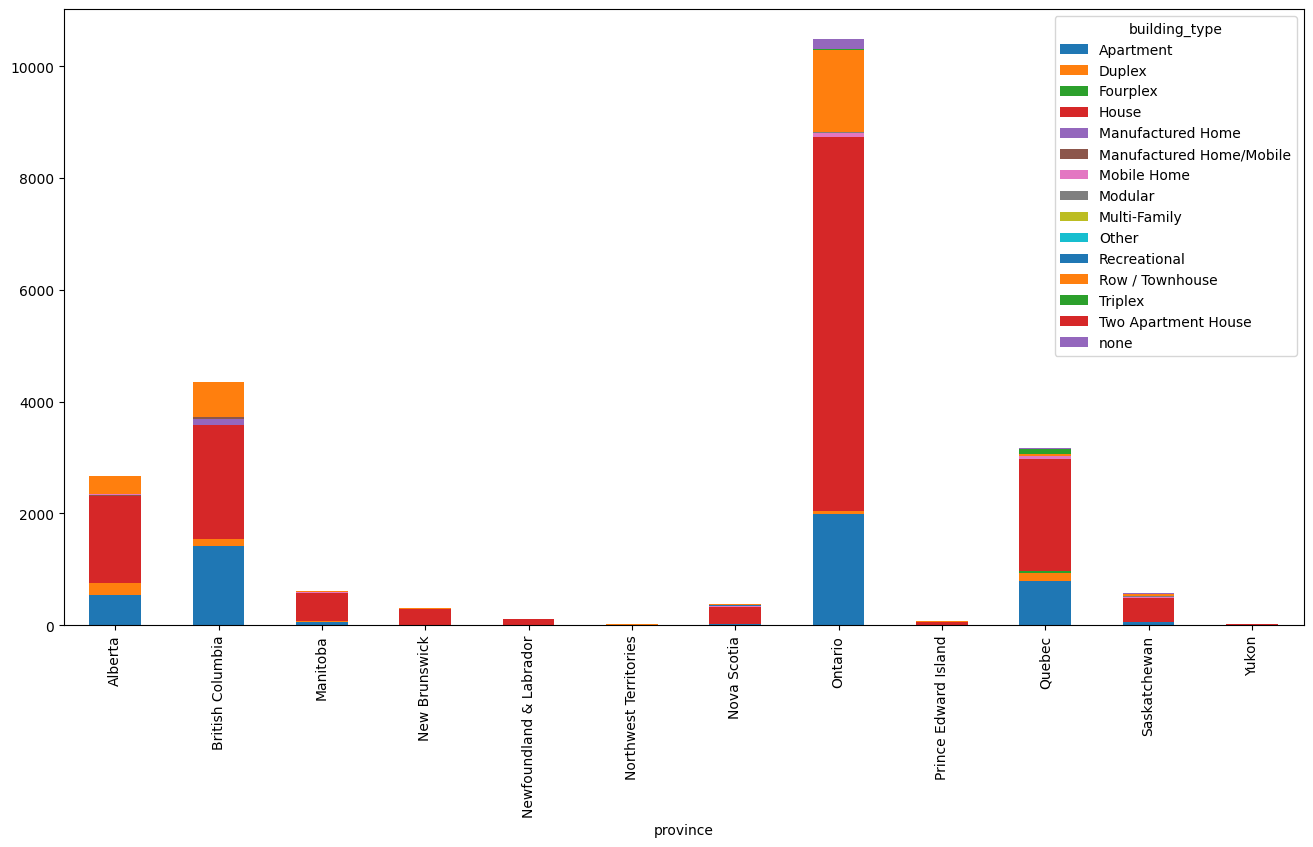

In [38]:
crosstab_building_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

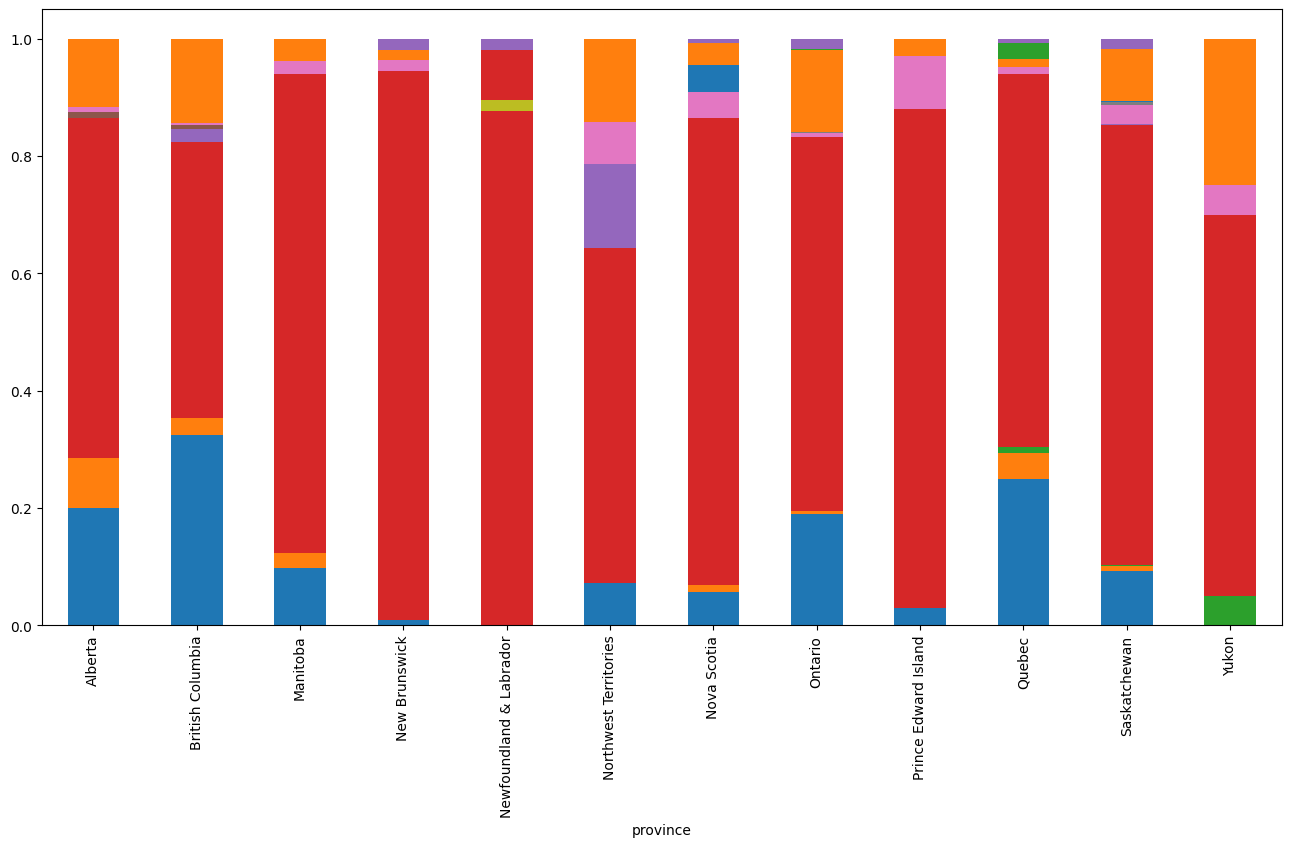

In [39]:
crosstab_building_type_norm = crosstab_building_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_building_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [40]:
crosstab_ownership_type = pd.crosstab(df_sf["province"], df_sf["ownership_type"])
crosstab_ownership_type

ownership_type,Condominium,Condominium/Strata,Cooperative,Freehold,Freehold Condo,Leasehold,Leasehold Condo/Strata,Leasehold/Leased Land,Life Lease,"Other, See Remarks",Shares in Co-operative,Strata,Timeshare/Fractional,Undivided Co-ownership,Unknown,none
province,,,,,,,,,,,,,,,,
Alberta,0,847,0,1688,0,12,0,0,0,0,0,0,0,0,0,119
British Columbia,0,52,0,1998,0,68,40,8,0,8,5,2104,5,0,8,63
Manitoba,0,0,0,520,83,6,0,0,3,0,0,0,0,0,1,0
New Brunswick,0,11,0,211,0,11,0,0,0,0,0,0,0,0,0,75
Newfoundland & Labrador,2,0,0,102,0,0,0,0,0,0,0,0,0,0,0,1
Northwest Territories,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,10
Nova Scotia,0,29,0,334,0,8,0,0,0,0,0,0,1,0,3,0
Ontario,580,2119,6,7361,0,71,5,0,6,2,10,0,4,1,0,331
Prince Edward Island,0,3,0,61,0,3,0,0,0,0,0,0,0,0,0,0


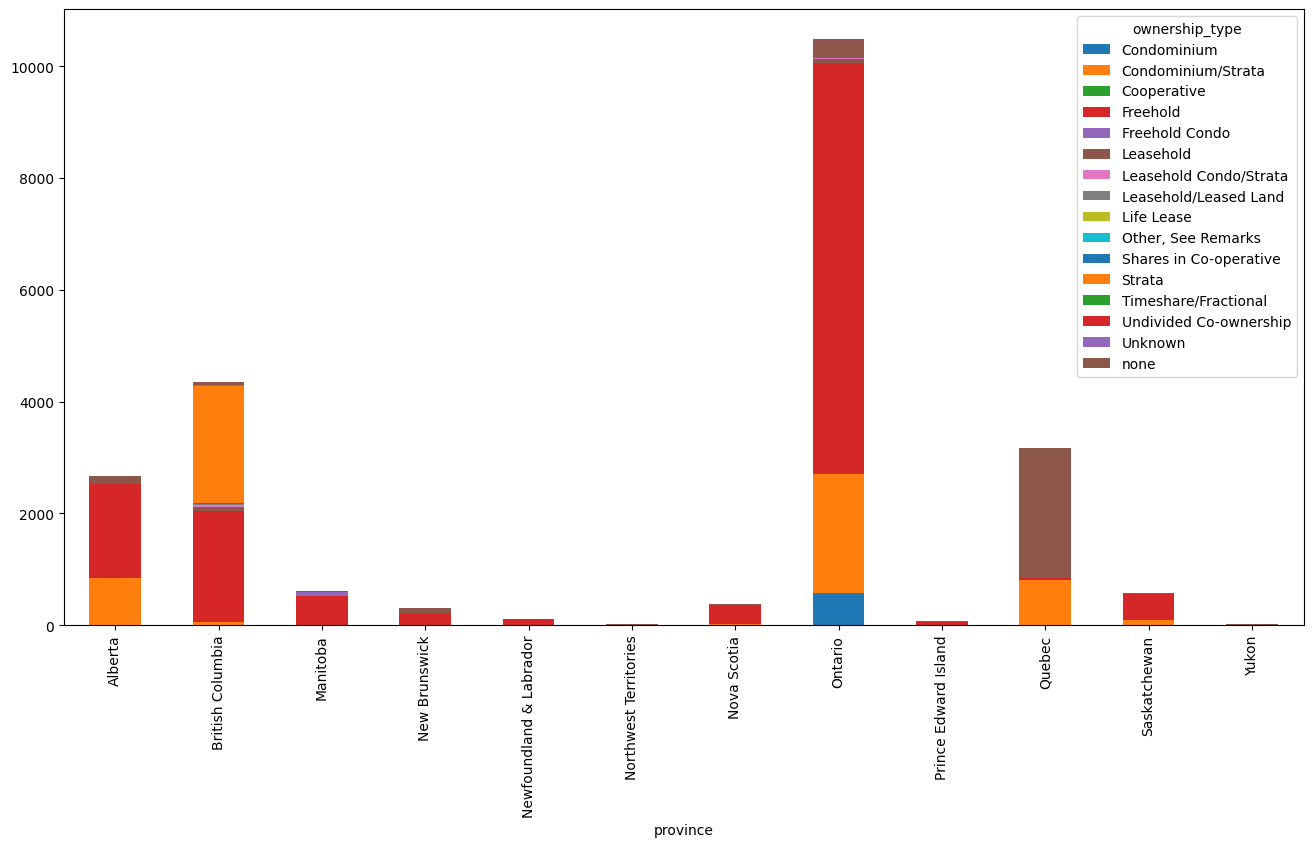

In [41]:
crosstab_ownership_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

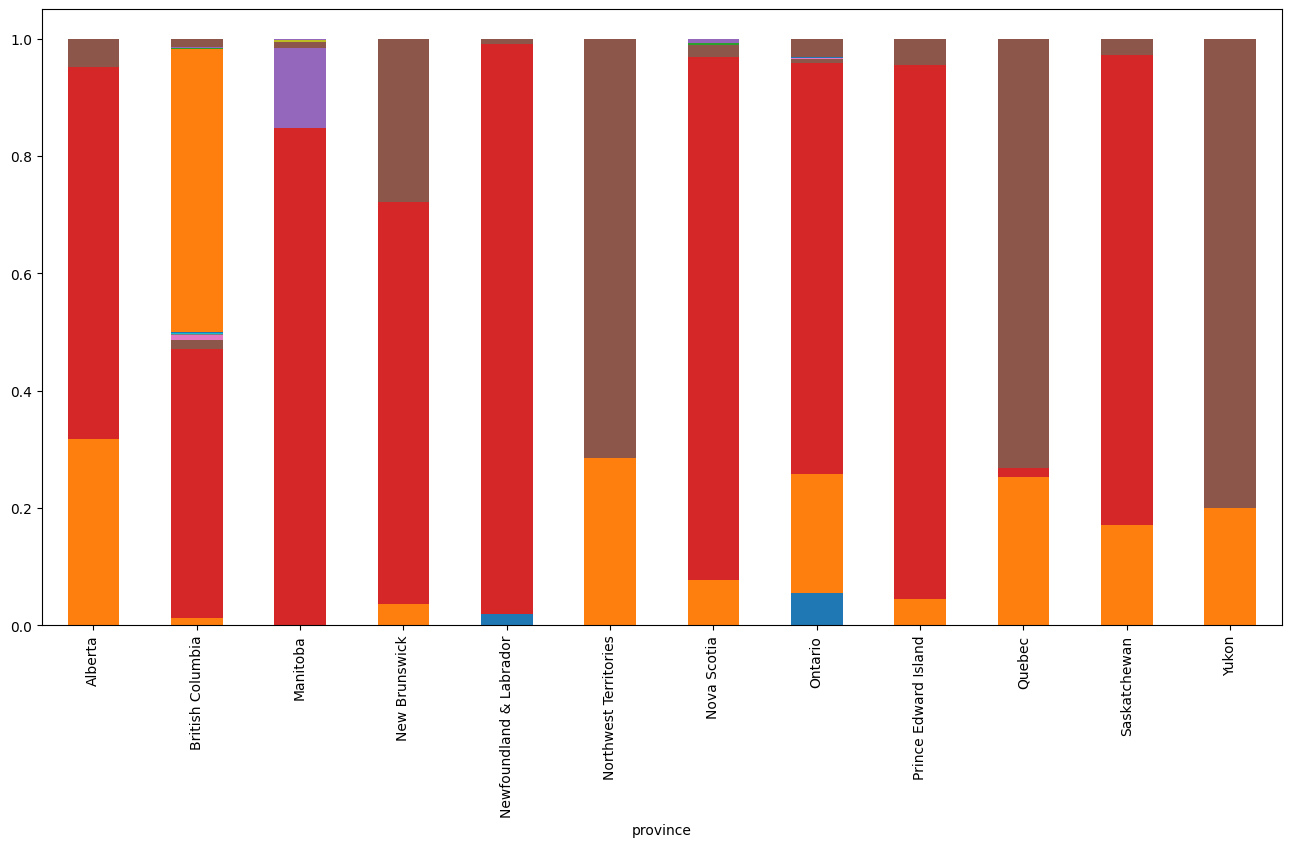

In [42]:
crosstab_ownership_type_norm = crosstab_ownership_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_ownership_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

### Building Type: House, Apartment, Row / Town House

In [43]:
df_app = df_sf[df_sf["building_type"] == "Apartment"]
df_app["ownership_type"].value_counts()

ownership_type
Condominium/Strata        3003
Strata                    1331
Condominium                331
Freehold Condo              58
Undivided Co-ownership      49
Leasehold Condo/Strata      30
Freehold                    20
Shares in Co-operative      12
none                         8
Timeshare/Fractional         6
Leasehold                    6
Life Lease                   5
Cooperative                  3
Leasehold/Leased Land        2
Unknown                      1
Other, See Remarks           1
Name: count, dtype: int64

In [44]:
df_dup = df_sf[df_sf["building_type"] == "Duplex"]
df_dup["ownership_type"].value_counts()

ownership_type
Freehold              248
none                  191
Strata                 88
Condominium/Strata     39
Name: count, dtype: int64

In [45]:
crosstab_ot_bt = pd.crosstab(df_sf["ownership_type"], df_sf["building_type"])
crosstab_ot_bt

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
ownership_type,,,,,,,,,,,,,,,
Condominium,331,0,0,19,0,0,0,0,0,0,0,230,0,0,2
Condominium/Strata,3003,39,1,78,0,5,1,0,0,5,0,808,0,0,28
Cooperative,3,0,0,1,0,0,2,0,0,0,0,0,0,0,0
Freehold,20,248,3,11405,16,45,41,4,2,0,21,878,1,9,44
Freehold Condo,58,0,0,9,0,0,0,0,0,0,0,16,0,0,0
Leasehold,6,0,0,38,35,7,86,16,0,0,0,3,0,0,4
Leasehold Condo/Strata,30,0,0,0,0,0,0,0,0,0,0,13,0,0,2
Leasehold/Leased Land,2,0,0,4,1,0,0,0,0,0,0,1,0,0,0
Life Lease,5,0,0,4,0,0,0,0,0,0,0,0,0,0,0


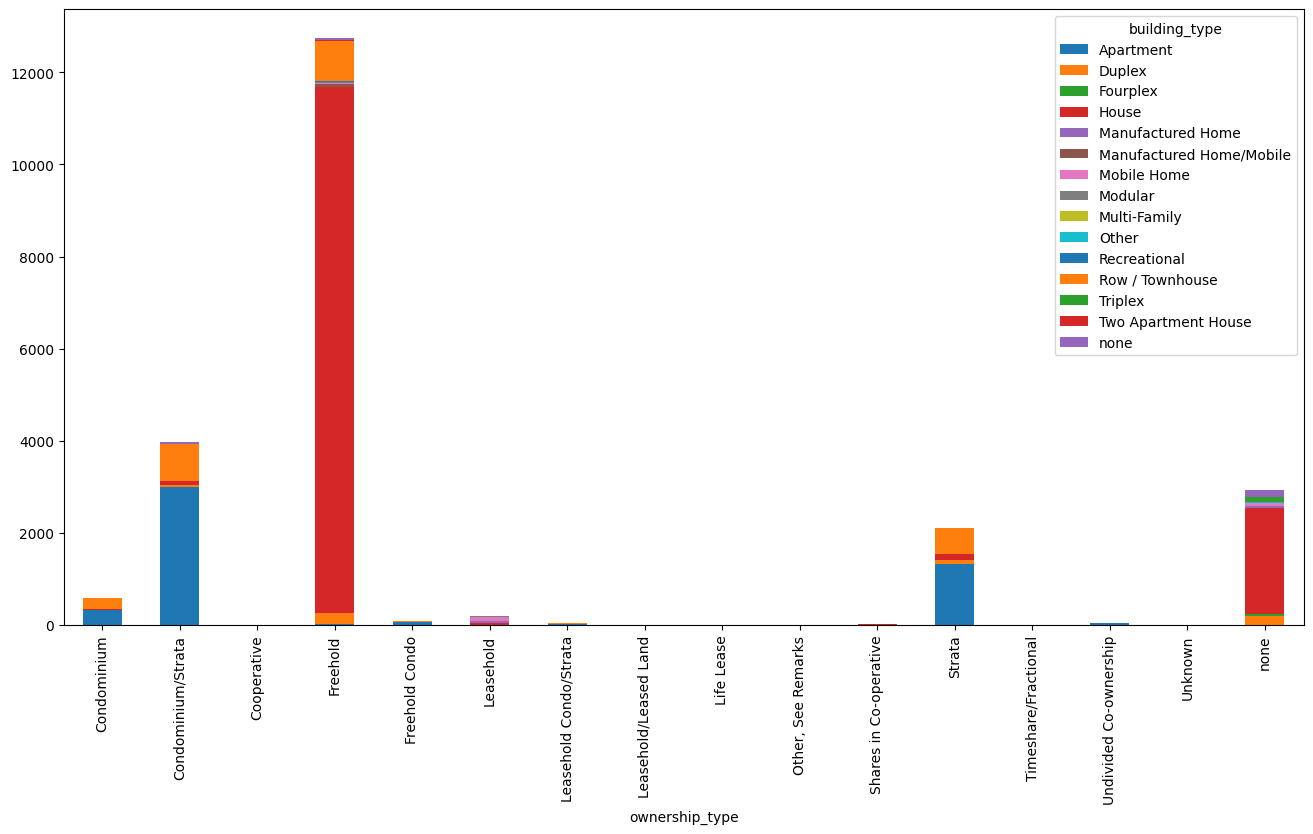

In [46]:
crosstab_ot_bt.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

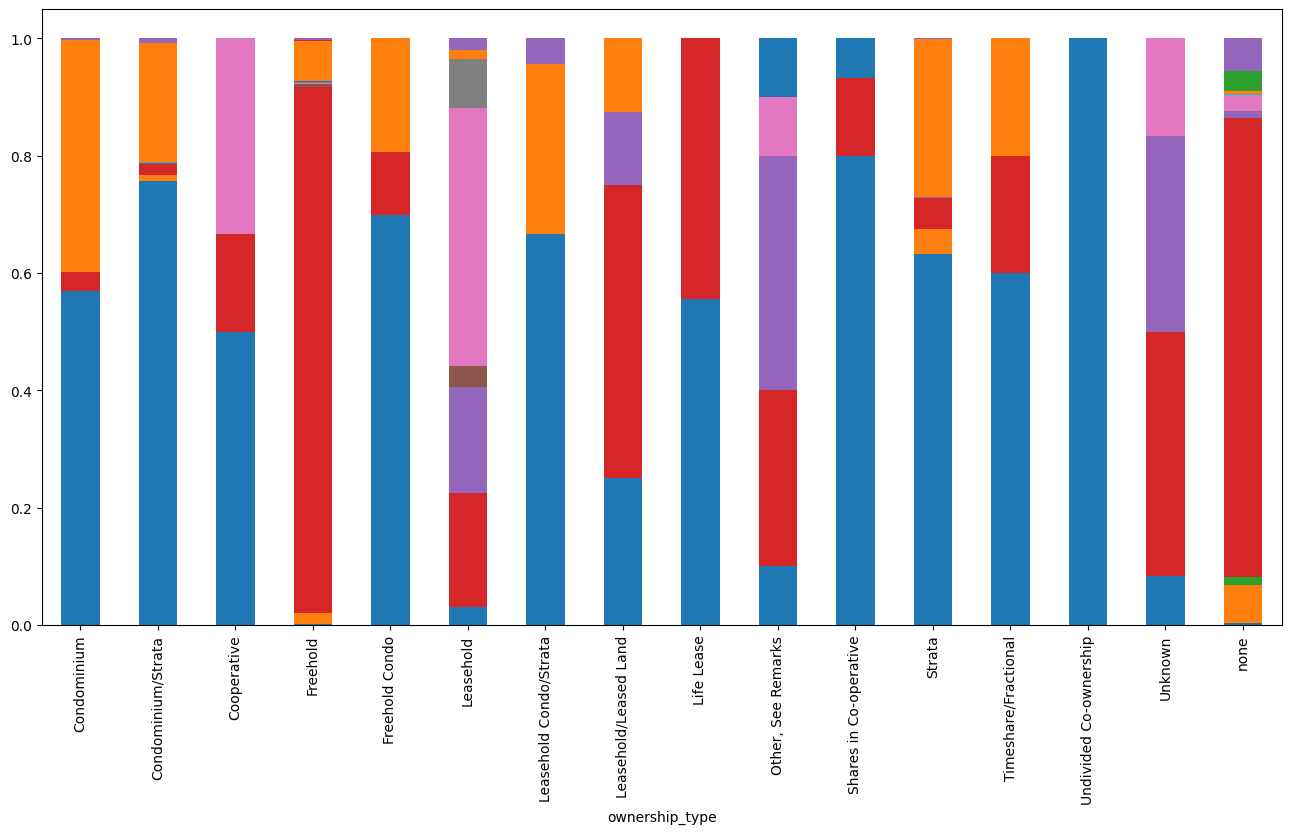

In [47]:
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [48]:
np.round(df_sf[df_sf["building_type"] == "Duplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,566.0,566.0,348.0,566.0,566.0,566.0,5.660000e+02,566.0
mean,26703179.0,3.0,2.0,-102.0,49.0,2.0,6.384782e+17,747593.0
std,9338.0,1.0,0.0,20.0,3.0,2.0,1.398590e+12,558803.0
min,26685225.0,0.0,1.0,-129.0,42.0,0.0,6.384751e+17,79000.0
25%,26695396.0,2.0,2.0,-114.0,46.0,0.0,6.384770e+17,395000.0
50%,26703220.0,3.0,2.0,-114.0,49.0,2.0,6.384783e+17,575000.0
75%,26711120.0,3.0,2.0,-76.0,51.0,4.0,6.384793e+17,875000.0
max,26718407.0,7.0,3.0,-63.0,57.0,21.0,6.384818e+17,3998000.0


In [49]:
np.round(df_sf[df_sf["building_type"] == "Triplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,102.0,102.0,60.0,102.0,102.0,102.0,1.020000e+02,102.0
mean,26701515.0,1.0,2.0,-75.0,46.0,3.0,6.384780e+17,792938.0
std,9544.0,1.0,0.0,5.0,1.0,3.0,1.449532e+12,346920.0
min,26685690.0,1.0,2.0,-122.0,43.0,0.0,6.384755e+17,180000.0
25%,26694798.0,1.0,2.0,-74.0,45.0,0.0,6.384769e+17,548025.0
50%,26701486.0,1.0,2.0,-74.0,46.0,2.0,6.384778e+17,774950.0
75%,26708898.0,1.0,3.0,-73.0,46.0,5.0,6.384788e+17,990000.0
max,26718293.0,6.0,3.0,-69.0,49.0,12.0,6.384817e+17,2050000.0


In [50]:
np.round(df_sf[df_sf["building_type"] == "Fourplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,47.0,47.0,29.0,47.0,47.0,47.0,4.700000e+01,47.0
mean,26703445.0,2.0,2.0,-78.0,46.0,3.0,6.384783e+17,942194.0
std,10992.0,2.0,1.0,14.0,3.0,3.0,1.686404e+12,417693.0
min,26685387.0,1.0,1.0,-135.0,43.0,0.0,6.384752e+17,129000.0
25%,26693078.0,1.0,2.0,-78.0,45.0,0.0,6.384768e+17,639450.0
50%,26705629.0,1.0,2.0,-74.0,46.0,3.0,6.384785e+17,924900.0
75%,26714122.0,3.0,2.0,-73.0,46.0,5.0,6.384795e+17,1183350.0
max,26718038.0,8.0,3.0,-67.0,61.0,13.0,6.384814e+17,2149999.0


In [51]:
np.round(df_sf[df_sf["building_type"] == "Row / Townhouse"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2531.0,2531.0,1817.0,2531.0,2531.0,2531.0,2.531000e+03,2531.0
mean,26702245.0,3.0,2.0,-95.0,46.0,2.0,6.384781e+17,761363.0
std,9306.0,1.0,1.0,20.0,4.0,1.0,1.372590e+12,382967.0
min,26685218.0,0.0,1.0,-135.0,42.0,0.0,6.384751e+17,15900.0
25%,26694276.0,2.0,2.0,-114.0,44.0,1.0,6.384769e+17,534900.0
50%,26702202.0,3.0,2.0,-80.0,45.0,2.0,6.384779e+17,699999.0
75%,26710324.0,3.0,3.0,-79.0,49.0,2.0,6.384792e+17,899900.0
max,26718601.0,24.0,38.0,-63.0,62.0,11.0,6.384818e+17,4395000.0


In [52]:
df_sd = df_sf.replace(["Duplex", "Triplex", "Fourplex"], "Semi-Detached")
df_sd["building_type"].value_counts()

building_type
House                       13982
Apartment                    4866
Row / Townhouse              2531
Semi-Detached                 715
none                          245
Mobile Home                   210
Manufactured Home             100
Manufactured Home/Mobile       58
Recreational                   23
Modular                        20
Other                          12
Two Apartment House             9
Multi-Family                    2
Name: count, dtype: int64

In [53]:
# Building Type: House, Apartment, Town House
df_bt = df_sd[(df_sd["building_type"] == "House") | 
              (df_sd["building_type"] == "Apartment") |
              (df_sd["building_type"] == "Semi-Detached") |
              (df_sd["building_type"] == "Row / Townhouse")]
df_bt["building_type"].value_counts()

building_type
House              13982
Apartment           4866
Row / Townhouse     2531
Semi-Detached        715
Name: count, dtype: int64

In [54]:
df_bt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22094 entries, 0 to 25165
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        22094 non-null  int64  
 1   id_mls                    22094 non-null  object 
 2   bathrooms_total           22094 non-null  int64  
 3   bedrooms                  22094 non-null  object 
 4   stories_total             15461 non-null  float64
 5   size_interior             13009 non-null  object 
 6   building_type             22094 non-null  object 
 7   agency_name               22094 non-null  object 
 8   agency_type               22094 non-null  object 
 9   property_type             22094 non-null  object 
 10  lng                       22094 non-null  float64
 11  lat                       22094 non-null  float64
 12  ownership_type            22094 non-null  object 
 13  ownership_type_group_ids  22094 non-null  object 
 14  land_size  

In [55]:
df_bt["province"].value_counts()

province
Ontario                    10198
British Columbia            4211
Quebec                      3113
Alberta                     2614
Manitoba                     599
Saskatchewan                 542
Nova Scotia                  338
New Brunswick                296
Newfoundland & Labrador       92
Prince Edward Island          61
Yukon                         19
Northwest Territories         11
Name: count, dtype: int64

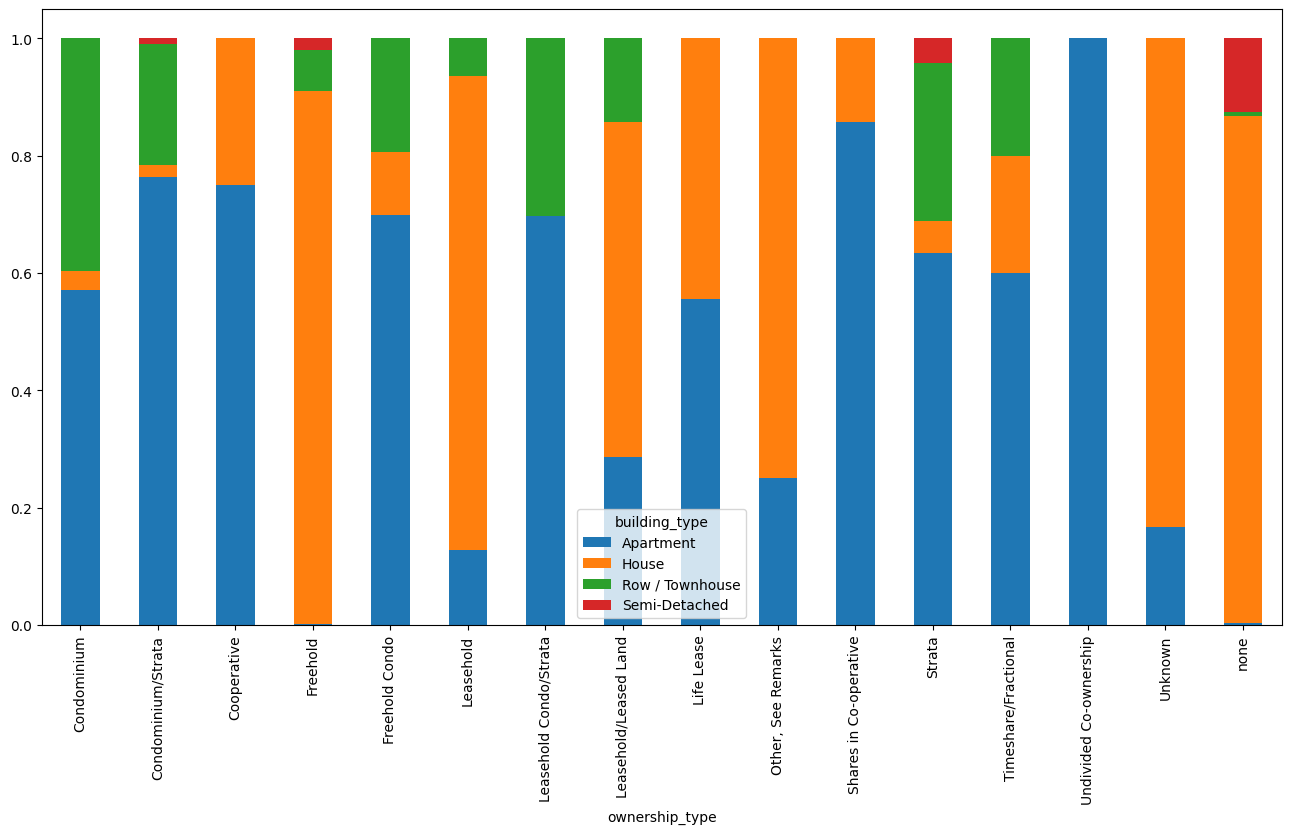

In [56]:
crosstab_ot_bt = pd.crosstab(df_bt["ownership_type"], df_bt["building_type"])
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

### Ownership Type ID: Freehold, Strata / Condo, Other Types

In [57]:
df_bt["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          12555
2           6748
none        2663
4             54
1 2           49
3             10
2 3            9
1 2 3 4        6
Name: count, dtype: int64

In [58]:
df_bt[df_bt["building_type"] == "House"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          11405
none        2302
2            222
4             42
1 2 3 4        5
2 3            4
3              2
Name: count, dtype: int64

In [59]:
df_bt[df_bt["building_type"] == "Apartment"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2          4765
1 2          49
1            20
none         12
4             8
3             6
2 3           5
1 2 3 4       1
Name: count, dtype: int64

In [60]:
df_bt[df_bt["building_type"] == "Semi-Detached"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
none    335
1       252
2       128
Name: count, dtype: int64

In [61]:
df_bt[df_bt["building_type"] == "Row / Townhouse"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2       1633
1        878
none      14
4          4
3          2
Name: count, dtype: int64

In [62]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,12555.0,12555.0,10066.0,12555.0,12555.0,12555.0,1.255500e+04,12555.0
mean,26701923.0,3.0,2.0,-91.0,47.0,3.0,6.384781e+17,1075154.0
std,9491.0,1.0,1.0,19.0,4.0,6.0,1.400041e+12,1013276.0
min,26685203.0,0.0,1.0,-130.0,42.0,0.0,6.384750e+17,1.0
25%,26693503.0,2.0,1.0,-113.0,44.0,0.0,6.384768e+17,559900.0
50%,26702395.0,3.0,2.0,-80.0,45.0,3.0,6.384779e+17,824990.0
75%,26710152.0,4.0,2.0,-79.0,50.0,5.0,6.384792e+17,1280000.0
max,26718602.0,24.0,5.0,-53.0,59.0,486.0,6.384818e+17,28880000.0


In [63]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "none"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2663.0,2663.0,2417.0,2663.0,2663.0,2663.0,2.663000e+03,2663.0
mean,26702432.0,2.0,2.0,-76.0,46.0,4.0,6.384781e+17,637590.0
std,9488.0,1.0,1.0,11.0,2.0,4.0,1.415863e+12,417829.0
min,26685227.0,0.0,1.0,-139.0,42.0,0.0,6.384751e+17,23650.0
25%,26694864.0,1.0,1.0,-74.0,45.0,2.0,6.384769e+17,385000.0
50%,26702328.0,2.0,2.0,-74.0,46.0,4.0,6.384779e+17,549000.0
75%,26710370.0,2.0,2.0,-72.0,47.0,6.0,6.384792e+17,774900.0
max,26718434.0,9.0,4.0,-54.0,64.0,44.0,6.384818e+17,3699000.0


In [64]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "3"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,10.0,10.0,5.0,10.0,10.0,10.0,1.000000e+01,10.0
mean,26707668.0,2.0,2.0,-100.0,47.0,0.0,6.384789e+17,204233.0
std,7175.0,1.0,0.0,26.0,3.0,0.0,1.277692e+12,278633.0
min,26699193.0,1.0,1.0,-125.0,44.0,0.0,6.384776e+17,15900.0
25%,26700347.0,2.0,2.0,-125.0,45.0,0.0,6.384778e+17,69000.0
50%,26708419.0,2.0,2.0,-101.0,47.0,0.0,6.384789e+17,87450.0
75%,26713473.0,3.0,2.0,-80.0,50.0,0.0,6.384795e+17,123538.0
max,26718462.0,4.0,2.0,-64.0,50.0,1.0,6.384818e+17,880880.0


In [65]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,54.0,54.0,33.0,54.0,54.0,54.0,5.400000e+01,54.0
mean,26701967.0,2.0,1.0,-101.0,48.0,1.0,6.384780e+17,539887.0
std,10273.0,1.0,1.0,21.0,3.0,2.0,1.570733e+12,430271.0
min,26685254.0,0.0,1.0,-124.0,43.0,0.0,6.384751e+17,99000.0
25%,26692555.0,1.0,1.0,-122.0,45.0,0.0,6.384768e+17,278125.0
50%,26701606.0,2.0,1.0,-104.0,49.0,0.0,6.384778e+17,407450.0
75%,26710320.0,2.0,1.0,-81.0,49.0,1.0,6.384792e+17,649675.0
max,26718503.0,5.0,3.0,-64.0,55.0,7.0,6.384818e+17,2499900.0


In [66]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1 2 3 4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,6.0,6.0,1.0,6.0,6.0,6.0,6.000000e+00,6.0
mean,26707520.0,2.0,2.0,-106.0,49.0,1.0,6.384786e+17,638333.0
std,9716.0,0.0,NaN,25.0,1.0,1.0,1.281504e+12,516328.0
min,26688900.0,1.0,2.0,-123.0,46.0,0.0,6.384762e+17,75000.0
25%,26706934.0,2.0,2.0,-122.0,49.0,0.0,6.384786e+17,286750.0
50%,26710576.0,2.0,2.0,-117.0,49.0,0.0,6.384790e+17,519500.0
75%,26713820.0,2.0,2.0,-102.0,50.0,1.0,6.384795e+17,923250.0
max,26714447.0,2.0,2.0,-60.0,50.0,3.0,6.384796e+17,1449000.0


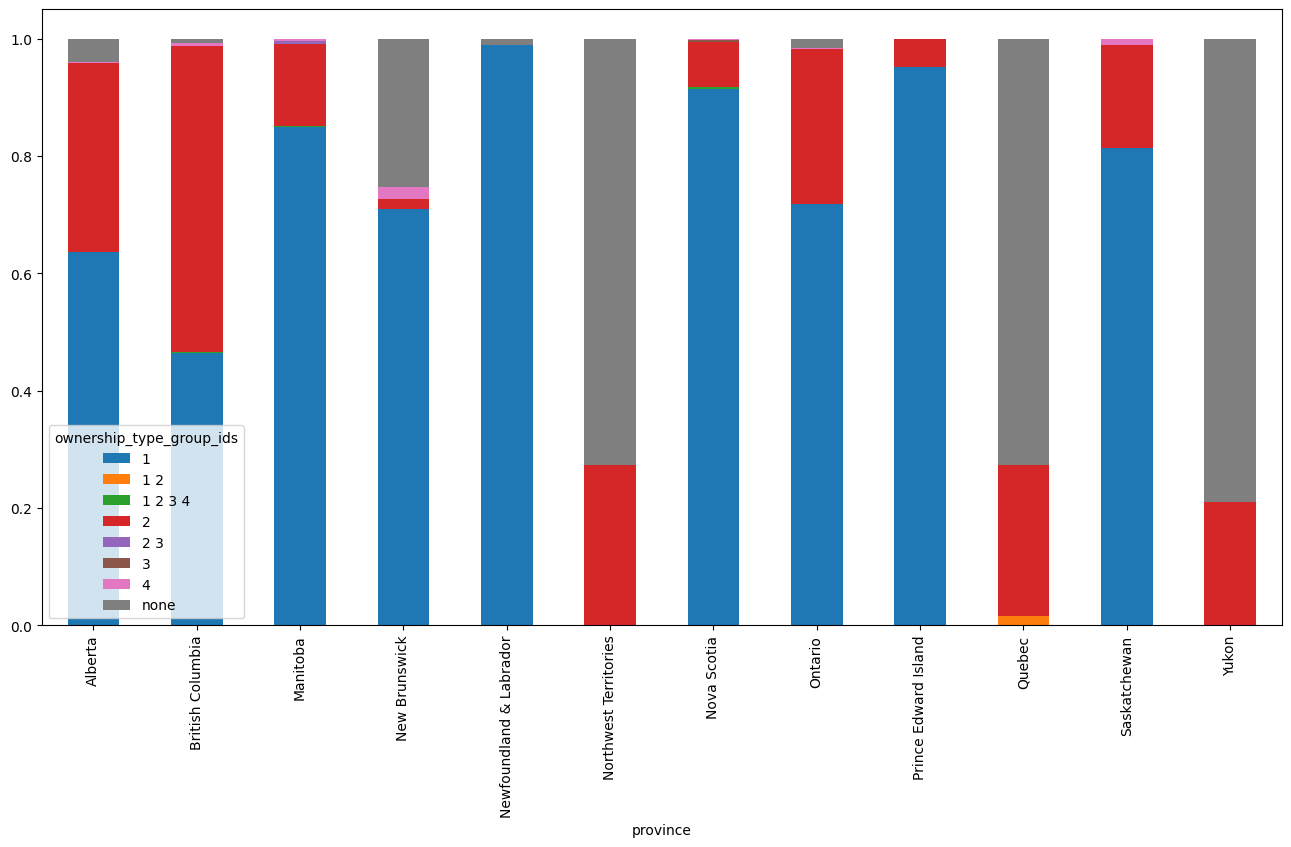

In [67]:
crosstab_oti_province = pd.crosstab(df_bt["province"], df_bt["ownership_type_group_ids"])
crosstab_oti_province_norm = crosstab_oti_province.div(crosstab_oti_province.sum(1), axis=0)
crosstab_oti_province_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

In [68]:
mask_other = (df_bt["ownership_type_group_ids"] == "none")
df_oti = df_bt.copy(deep=True)
df_oti.loc[mask_other, "ownership_type_group_ids"] = "0"
df_oti["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          12555
2           6748
0           2663
4             54
1 2           49
3             10
2 3            9
1 2 3 4        6
Name: count, dtype: int64

In [69]:
df_oti_new = df_oti[(df_oti["ownership_type_group_ids"] == "1") | 
                    (df_oti["ownership_type_group_ids"] == "2") |
                    (df_oti["ownership_type_group_ids"] == "0")]

df_oti_new["ownership_type_group_ids"].value_counts()

# 1: Freehold
# 2: Strata / Condo
# 3: Other

ownership_type_group_ids
1    12555
2     6748
0     2663
Name: count, dtype: int64

In [70]:
df_oti_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21966 entries, 0 to 25165
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21966 non-null  int64  
 1   id_mls                    21966 non-null  object 
 2   bathrooms_total           21966 non-null  int64  
 3   bedrooms                  21966 non-null  object 
 4   stories_total             15369 non-null  float64
 5   size_interior             12895 non-null  object 
 6   building_type             21966 non-null  object 
 7   agency_name               21966 non-null  object 
 8   agency_type               21966 non-null  object 
 9   property_type             21966 non-null  object 
 10  lng                       21966 non-null  float64
 11  lat                       21966 non-null  float64
 12  ownership_type            21966 non-null  object 
 13  ownership_type_group_ids  21966 non-null  object 
 14  land_size  

In [71]:
df_oti_new["province"].value_counts()

province
Ontario                    10173
British Columbia            4180
Quebec                      3065
Alberta                     2612
Manitoba                     592
Saskatchewan                 536
Nova Scotia                  335
New Brunswick                290
Newfoundland & Labrador       92
Prince Edward Island          61
Yukon                         19
Northwest Territories         11
Name: count, dtype: int64

In [72]:
# DROP UNNECESSARY COLUMNS !!!

## Converting "Bedrooms" to Number

In [73]:
df = df_oti_new

In [74]:
df["bedrooms"].str.contains("\+").value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6934/1959575819.py:1: SyntaxWarning: invalid escape sequence '\+'
  df["bedrooms"].str.contains("\+").value_counts()


bedrooms
False    13460
True      8506
Name: count, dtype: int64

In [75]:
df.shape

(21966, 21)

In [76]:
df[df["bedrooms"].str.contains("\+")].head()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6934/553941688.py:1: SyntaxWarning: invalid escape sequence '\+'
  df[df["bedrooms"].str.contains("\+")].head()


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26718475,24007199,4,4 + 1,2.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,...,42.244691,Freehold,1,69X226,0,https://realtor.ca/real-estate/26718475/4355-c...,638481785152970000,N9G2B2,Ontario,1699900.0
2,26718165,24007077,3,3 + 0,1.0,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,...,42.216566,Freehold,1,63.34X150.45'X 73.89' X 146.39',0,https://realtor.ca/real-estate/26718165/3792-s...,638481484406700000,N9H0G6,Ontario,1250000.0
6,26713832,24007152,4,4 + 0,2.0,NaN,House,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,Single Family,...,42.136711,none,0,60.01X127.95,0,https://realtor.ca/real-estate/26713832/lot-52...,638479480521800000,N9V0G9,Ontario,1089000.0
7,26713829,24007159,4,1 + 4,2.0,2700.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,Single Family,...,42.274267,Freehold,1,50X114,0,https://realtor.ca/real-estate/26713829/2435-r...,638479480512330000,N9E2Z7,Ontario,1199000.0
8,26713544,24007151,3,4 + 1,2.0,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,Single Family,...,42.302405,Freehold,1,30X100 FT,0,https://realtor.ca/real-estate/26713544/1308-c...,638479444489600000,N8X1T8,Ontario,379900.0


In [77]:
bed_plus = df[df["bedrooms"].str.contains("\+")]

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6934/975990458.py:1: SyntaxWarning: invalid escape sequence '\+'
  bed_plus = df[df["bedrooms"].str.contains("\+")]


In [78]:
bed_plus
bed_extra = [bed.split()[-1] for bed in bed_plus["bedrooms"]]

In [79]:
pd.DataFrame(bed_extra).value_counts()

0
0    3876
1    3136
2    1257
3     210
4      18
5       6
6       1
7       1
9       1
Name: count, dtype: int64

In [80]:
bedrooms_extra = []

for bedroom in df["bedrooms"]:
    splited_cell = bedroom.split()
    if len(splited_cell) > 1:
        bedrooms_extra.append(splited_cell[-1])
    else:
        bedrooms_extra.append("0")

In [81]:
len(bedrooms_extra)

21966

In [82]:
bedrooms_extra[:20]

['1',
 '0',
 '0',
 '4',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0',
 '0',
 '2',
 '0',
 '0',
 '0',
 '2',
 '0',
 '0']

In [83]:
df.insert(2, "bedrooms_extra", bedrooms_extra)

In [84]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26718475,24007199,1,4,4 + 1,2.00,NaN,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.244691,Freehold,1,69X226,0,https://realtor.ca/real-estate/26718475/4355-c...,638481785152970000,N9G2B2,Ontario,1699900.0
2,26718165,24007077,0,3,3 + 0,1.00,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.216566,Freehold,1,63.34X150.45'X 73.89' X 146.39',0,https://realtor.ca/real-estate/26718165/3792-s...,638481484406700000,N9H0G6,Ontario,1250000.0
6,26713832,24007152,0,4,4 + 0,2.00,NaN,House,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,...,42.136711,none,0,60.01X127.95,0,https://realtor.ca/real-estate/26713832/lot-52...,638479480521800000,N9V0G9,Ontario,1089000.0
7,26713829,24007159,4,4,1 + 4,2.00,2700.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.274267,Freehold,1,50X114,0,https://realtor.ca/real-estate/26713829/2435-r...,638479480512330000,N9E2Z7,Ontario,1199000.0
8,26713544,24007151,1,3,4 + 1,2.00,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.302405,Freehold,1,30X100 FT,0,https://realtor.ca/real-estate/26713544/1308-c...,638479444489600000,N8X1T8,Ontario,379900.0
9,26713543,24007154,1,3,3 + 1,1.00,NaN,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.197049,Freehold,1,120.49X2232.02,0,https://realtor.ca/real-estate/26713543/8550-d...,638479444487530000,N9A6Z6,Ontario,899900.0
10,26713269,X8207168,0,1,4,2.00,NaN,House,HOUSEEO REALTY,Firm,...,42.309735,Freehold,1,30.12 x 62.87 FT,0,https://realtor.ca/real-estate/26713269/371-jo...,638479423849470000,N9B2K9,Ontario,299999.0
11,26712604,24007146,0,2,5 + 0,1.75,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.306257,Freehold,1,30X105,0,https://realtor.ca/real-estate/26712604/556-ra...,638479408519770000,N9B2T6,Ontario,465000.0
12,26712605,24007144,0,3,4 + 0,2.00,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.239357,Freehold,1,68.5X148.22 FT,0,https://realtor.ca/real-estate/26712605/lot-8-...,638479408522370000,N8N1M2,Ontario,1649900.0
13,26712602,24007150,0,2,2 + 0,NaN,1129.0000,Apartment,THE SIGNATURE GROUP REALTY INC,Firm,...,42.236292,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26712602/2550-s...,638479408513270000,N9H2R6,Ontario,529999.0


In [85]:
df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]

/tmp/ipykernel_6934/2251018251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21966 entries, 0 to 25165
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21966 non-null  int64  
 1   id_mls                    21966 non-null  object 
 2   bedrooms_extra            21966 non-null  object 
 3   bathrooms_total           21966 non-null  int64  
 4   bedrooms                  21966 non-null  object 
 5   stories_total             15369 non-null  float64
 6   size_interior             12895 non-null  object 
 7   building_type             21966 non-null  object 
 8   agency_name               21966 non-null  object 
 9   agency_type               21966 non-null  object 
 10  property_type             21966 non-null  object 
 11  lng                       21966 non-null  float64
 12  lat                       21966 non-null  float64
 13  ownership_type            21966 non-null  object 
 14  ownership_t

In [87]:
df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)

/tmp/ipykernel_6934/1101565595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)


In [88]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26718475,24007199,1,4,4,2.00,NaN,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.244691,Freehold,1,69X226,0,https://realtor.ca/real-estate/26718475/4355-c...,638481785152970000,N9G2B2,Ontario,1699900.0
2,26718165,24007077,0,3,3,1.00,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.216566,Freehold,1,63.34X150.45'X 73.89' X 146.39',0,https://realtor.ca/real-estate/26718165/3792-s...,638481484406700000,N9H0G6,Ontario,1250000.0
6,26713832,24007152,0,4,4,2.00,NaN,House,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,...,42.136711,none,0,60.01X127.95,0,https://realtor.ca/real-estate/26713832/lot-52...,638479480521800000,N9V0G9,Ontario,1089000.0
7,26713829,24007159,4,4,1,2.00,2700.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.274267,Freehold,1,50X114,0,https://realtor.ca/real-estate/26713829/2435-r...,638479480512330000,N9E2Z7,Ontario,1199000.0
8,26713544,24007151,1,3,4,2.00,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.302405,Freehold,1,30X100 FT,0,https://realtor.ca/real-estate/26713544/1308-c...,638479444489600000,N8X1T8,Ontario,379900.0
9,26713543,24007154,1,3,3,1.00,NaN,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.197049,Freehold,1,120.49X2232.02,0,https://realtor.ca/real-estate/26713543/8550-d...,638479444487530000,N9A6Z6,Ontario,899900.0
10,26713269,X8207168,0,1,4,2.00,NaN,House,HOUSEEO REALTY,Firm,...,42.309735,Freehold,1,30.12 x 62.87 FT,0,https://realtor.ca/real-estate/26713269/371-jo...,638479423849470000,N9B2K9,Ontario,299999.0
11,26712604,24007146,0,2,5,1.75,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.306257,Freehold,1,30X105,0,https://realtor.ca/real-estate/26712604/556-ra...,638479408519770000,N9B2T6,Ontario,465000.0
12,26712605,24007144,0,3,4,2.00,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.239357,Freehold,1,68.5X148.22 FT,0,https://realtor.ca/real-estate/26712605/lot-8-...,638479408522370000,N8N1M2,Ontario,1649900.0
13,26712602,24007150,0,2,2,NaN,1129.0000,Apartment,THE SIGNATURE GROUP REALTY INC,Firm,...,42.236292,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26712602/2550-s...,638479408513270000,N9H2R6,Ontario,529999.0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21966 entries, 0 to 25165
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21966 non-null  int64  
 1   id_mls                    21966 non-null  object 
 2   bedrooms_extra            21966 non-null  int64  
 3   bathrooms_total           21966 non-null  int64  
 4   bedrooms                  21966 non-null  int64  
 5   stories_total             15369 non-null  float64
 6   size_interior             12895 non-null  object 
 7   building_type             21966 non-null  object 
 8   agency_name               21966 non-null  object 
 9   agency_type               21966 non-null  object 
 10  property_type             21966 non-null  object 
 11  lng                       21966 non-null  float64
 12  lat                       21966 non-null  float64
 13  ownership_type            21966 non-null  object 
 14  ownership_t

## Handling Storeys

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21966 entries, 0 to 25165
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21966 non-null  int64  
 1   id_mls                    21966 non-null  object 
 2   bedrooms_extra            21966 non-null  int64  
 3   bathrooms_total           21966 non-null  int64  
 4   bedrooms                  21966 non-null  int64  
 5   stories_total             15369 non-null  float64
 6   size_interior             12895 non-null  object 
 7   building_type             21966 non-null  object 
 8   agency_name               21966 non-null  object 
 9   agency_type               21966 non-null  object 
 10  property_type             21966 non-null  object 
 11  lng                       21966 non-null  float64
 12  lat                       21966 non-null  float64
 13  ownership_type            21966 non-null  object 
 14  ownership_t

In [91]:
df.head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26718475,24007199,1,4,4,2.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.244691,Freehold,1,69X226,0,https://realtor.ca/real-estate/26718475/4355-c...,638481785152970000,N9G2B2,Ontario,1699900.0
2,26718165,24007077,0,3,3,1.0,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.216566,Freehold,1,63.34X150.45'X 73.89' X 146.39',0,https://realtor.ca/real-estate/26718165/3792-s...,638481484406700000,N9H0G6,Ontario,1250000.0
6,26713832,24007152,0,4,4,2.0,NaN,House,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,...,42.136711,none,0,60.01X127.95,0,https://realtor.ca/real-estate/26713832/lot-52...,638479480521800000,N9V0G9,Ontario,1089000.0
7,26713829,24007159,4,4,1,2.0,2700.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.274267,Freehold,1,50X114,0,https://realtor.ca/real-estate/26713829/2435-r...,638479480512330000,N9E2Z7,Ontario,1199000.0
8,26713544,24007151,1,3,4,2.0,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.302405,Freehold,1,30X100 FT,0,https://realtor.ca/real-estate/26713544/1308-c...,638479444489600000,N8X1T8,Ontario,379900.0


In [92]:
df["stories_total"].value_counts().sort_index()

stories_total
1.00      5571
1.50       626
1.75        38
2.00      7213
2.50       141
3.00      1003
4.00       327
5.00        53
6.00        88
7.00        19
8.00        39
9.00        14
10.00       17
11.00        6
12.00       13
13.00        2
14.00        8
15.00       20
16.00        8
17.00        8
18.00        7
19.00       11
20.00        5
21.00        7
22.00        4
23.00        9
24.00        2
25.00        7
26.00        3
27.00        5
28.00        8
29.00        3
30.00        6
31.00        7
32.00        5
33.00        2
34.00       11
35.00        6
36.00        3
38.00        5
40.00        2
41.00        1
43.00        1
44.00        9
45.00        1
46.00        1
50.00        3
52.00        1
53.00        1
55.00        1
57.00       13
58.00        1
94.00        1
136.00       1
159.00       1
345.00       1
Name: count, dtype: int64

In [93]:
df["stories_total"].value_counts().sort_index().head(20)

stories_total
1.00     5571
1.50      626
1.75       38
2.00     7213
2.50      141
3.00     1003
4.00      327
5.00       53
6.00       88
7.00       19
8.00       39
9.00       14
10.00      17
11.00       6
12.00      13
13.00       2
14.00       8
15.00      20
16.00       8
17.00       8
Name: count, dtype: int64

In [94]:
df[df["stories_total"] == 0].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [95]:
df[df["stories_total"] == 0]["building_type"].value_counts()

Series([], Name: count, dtype: int64)

In [96]:
df[df["stories_total"] == 0]["page_url"]

Series([], Name: page_url, dtype: object)

In [97]:
df[df["stories_total"].isna()]["building_type"].value_counts()

building_type
Apartment          3037
House              2570
Row / Townhouse     712
Semi-Detached       278
Name: count, dtype: int64

In [98]:
df[df["stories_total"].isna()]["page_url"]

13       https://realtor.ca/real-estate/26712602/2550-s...
16       https://realtor.ca/real-estate/26711322/1855-w...
18       https://realtor.ca/real-estate/26710914/520-mi...
28       https://realtor.ca/real-estate/26707340/5840-n...
45       https://realtor.ca/real-estate/26703632/514-gr...
                               ...                        
25161    https://realtor.ca/real-estate/26691527/155-ri...
25162    https://realtor.ca/real-estate/26691140/25-705...
25163    https://realtor.ca/real-estate/26689306/507-kn...
25164    https://realtor.ca/real-estate/26686534/209-ni...
25165    https://realtor.ca/real-estate/26707477/1356-5...
Name: page_url, Length: 6597, dtype: object

In [99]:
# if story is 0 or none, make it 1
df_storey = df.copy(deep=True)
df_storey["stories_total"] = df_storey["stories_total"].replace(0, 1)
df_storey["stories_total"] = df_storey["stories_total"].fillna(1)
df_storey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21966 entries, 0 to 25165
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21966 non-null  int64  
 1   id_mls                    21966 non-null  object 
 2   bedrooms_extra            21966 non-null  int64  
 3   bathrooms_total           21966 non-null  int64  
 4   bedrooms                  21966 non-null  int64  
 5   stories_total             21966 non-null  float64
 6   size_interior             12895 non-null  object 
 7   building_type             21966 non-null  object 
 8   agency_name               21966 non-null  object 
 9   agency_type               21966 non-null  object 
 10  property_type             21966 non-null  object 
 11  lng                       21966 non-null  float64
 12  lat                       21966 non-null  float64
 13  ownership_type            21966 non-null  object 
 14  ownership_t

In [100]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     12168
2.00      7213
3.00      1003
1.50       626
4.00       327
2.50       141
6.00        88
5.00        53
8.00        39
1.75        38
15.00       20
7.00        19
10.00       17
9.00        14
57.00       13
12.00       13
34.00       11
19.00       11
23.00        9
44.00        9
Name: count, dtype: int64

In [101]:
df_storey[df_storey["stories_total"] == 3]["page_url"]

396      https://realtor.ca/real-estate/26718342/1399-c...
568      https://realtor.ca/real-estate/26707103/150-ma...
677      https://realtor.ca/real-estate/26701149/3867-p...
686      https://realtor.ca/real-estate/26700260/106-20...
693      https://realtor.ca/real-estate/26699603/2070-m...
                               ...                        
25053    https://realtor.ca/real-estate/26693129/9423-1...
25077    https://realtor.ca/real-estate/26716759/400-si...
25084    https://realtor.ca/real-estate/26714026/12-100...
25116    https://realtor.ca/real-estate/26686187/306-23...
25124    https://realtor.ca/real-estate/26691693/5520-t...
Name: page_url, Length: 1003, dtype: object

In [102]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["province"].value_counts()

province
Quebec                  613
Alberta                 335
British Columbia        186
Ontario                  71
Nova Scotia               2
Prince Edward Island      1
Manitoba                  1
Name: count, dtype: int64

In [103]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["page_url"]

940      https://realtor.ca/real-estate/26713646/361-qu...
1358     https://realtor.ca/real-estate/26715149/2700-b...
1418     https://realtor.ca/real-estate/26707607/1630-b...
1661     https://realtor.ca/real-estate/26716458/350-ri...
1782     https://realtor.ca/real-estate/26712047/111-30...
                               ...                        
25064    https://realtor.ca/real-estate/26708442/219-78...
25070    https://realtor.ca/real-estate/26718375/419-10...
25083    https://realtor.ca/real-estate/26714225/1644-2...
25098    https://realtor.ca/real-estate/26703444/2110-2...
25116    https://realtor.ca/real-estate/26686187/306-23...
Name: page_url, Length: 1209, dtype: object

In [104]:
mask_apt_storey = (df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)
mask_apt_storey

0        False
2        False
6        False
7        False
8        False
         ...  
25161    False
25162    False
25163    False
25164    False
25165    False
Length: 21966, dtype: bool

In [105]:
~mask_apt_storey

0        True
2        True
6        True
7        True
8        True
         ... 
25161    True
25162    True
25163    True
25164    True
25165    True
Length: 21966, dtype: bool

In [106]:
df_storey = df_storey[~mask_apt_storey] # drop apartments with storey other than 1

In [107]:
# df_storey.loc[df_storey["building_type"] == "Apartment", "stories_total"] = 1

In [108]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     12168
2.00      7080
3.00       691
1.50       625
2.50       141
1.75        38
4.00        12
38.00        1
5.00         1
Name: count, dtype: int64

In [109]:
df_storey["stories_total"].unique()

array([ 2.  ,  1.  ,  1.75,  1.5 ,  2.5 ,  3.  ,  4.  , 38.  ,  5.  ])

In [110]:
df = df_storey

## Handling Interior Size (Phase 1)

### First Looks

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20757 entries, 0 to 25165
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20757 non-null  int64  
 1   id_mls                    20757 non-null  object 
 2   bedrooms_extra            20757 non-null  int64  
 3   bathrooms_total           20757 non-null  int64  
 4   bedrooms                  20757 non-null  int64  
 5   stories_total             20757 non-null  float64
 6   size_interior             11745 non-null  object 
 7   building_type             20757 non-null  object 
 8   agency_name               20757 non-null  object 
 9   agency_type               20757 non-null  object 
 10  property_type             20757 non-null  object 
 11  lng                       20757 non-null  float64
 12  lat                       20757 non-null  float64
 13  ownership_type            20757 non-null  object 
 14  ownership_t

In [112]:
df["size_interior"].value_counts()

size_interior
1200 sqft    32
1200.0000    28
1120 sqft    27
1040 sqft    25
1000 sqft    23
             ..
2357 sqft     1
546 sqft      1
1129.5000     1
804.0000      1
3326 sqft     1
Name: count, Length: 6480, dtype: int64

In [113]:
df[df["size_interior"].notna()]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
7,26713829,24007159,4,4,1,2.0,2700.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.274267,Freehold,1,50X114,0,https://realtor.ca/real-estate/26713829/2435-r...,638479480512330000,N9E2Z7,Ontario,1199000.0
13,26712602,24007150,0,2,2,1.0,1129.0000,Apartment,THE SIGNATURE GROUP REALTY INC,Firm,...,42.236292,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26712602/2550-s...,638479408513270000,N9H2R6,Ontario,529999.0
28,26707340,24007054,0,2,2,1.0,1525.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.248917,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26707340/5840-n...,638478580675170000,N0J0E3,Ontario,549900.0
37,26704785,24006936,0,3,3,2.5,1534.0000,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.323537,Freehold,1,30X115,0,https://realtor.ca/real-estate/26704785/315-gl...,638478436849700000,N9A2P6,Ontario,429900.0
39,26704782,24006999,1,7,5,2.0,5500.0000,House,THE SIGNATURE GROUP REALTY INC,Firm,...,42.223495,Freehold,1,89.89XIRREG,0,https://realtor.ca/real-estate/26704782/15-uni...,638478436813600000,N9H0M9,Ontario,2590000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161,26691527,5731,0,2,3,1.0,2140 sqft,House,COLDWELL BANKER NBS,Firm,...,62.450687,none,0,14575,0,https://realtor.ca/real-estate/26691527/155-ri...,638476752215900000,NaN,Northwest Territories,875000.0
25162,26691140,5730,0,2,3,1.0,1369 sqft,Row / Townhouse,RE/MAX North of 60,Firm,...,62.441894,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26691140/25-705...,638476715929770000,X1A3W9,Northwest Territories,409900.0
25163,26689306,5728,0,3,4,1.0,1668 sqft,House,RE/MAX North of 60,Firm,...,62.443042,none,0,6179,0,https://realtor.ca/real-estate/26689306/507-kn...,638476548319100000,X1A2Y5,Northwest Territories,629900.0
25164,26686534,5727,0,3,4,1.0,2900 sqft,House,CENTURY 21 Prospect Realty,Firm,...,62.465253,none,0,5554,0,https://realtor.ca/real-estate/26686534/209-ni...,638475832164600000,NaN,Northwest Territories,824900.0


In [114]:
df[(df["province"]=="Ontario") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
7,26713829,24007159,4,4,1,2.0,2700.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.274267,Freehold,1,50X114,0,https://realtor.ca/real-estate/26713829/2435-r...,638479480512330000,N9E2Z7,Ontario,1199000.0
13,26712602,24007150,0,2,2,1.0,1129.0000,Apartment,THE SIGNATURE GROUP REALTY INC,Firm,...,42.236292,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26712602/2550-s...,638479408513270000,N9H2R6,Ontario,529999.0
28,26707340,24007054,0,2,2,1.0,1525.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.248917,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26707340/5840-n...,638478580675170000,N0J0E3,Ontario,549900.0
37,26704785,24006936,0,3,3,2.5,1534.0000,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.323537,Freehold,1,30X115,0,https://realtor.ca/real-estate/26704785/315-gl...,638478436849700000,N9A2P6,Ontario,429900.0
39,26704782,24006999,1,7,5,2.0,5500.0000,House,THE SIGNATURE GROUP REALTY INC,Firm,...,42.223495,Freehold,1,89.89XIRREG,0,https://realtor.ca/real-estate/26704782/15-uni...,638478436813600000,N9H0M9,Ontario,2590000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16324,26692561,TB240707,0,1,2,1.0,1098.0000,Apartment,STREETCITY REALTY INC.,Firm,...,48.465466,Condominium,2,under 1/2 acre,0,https://realtor.ca/real-estate/26692561/207-50...,638476795792300000,P7A8A6,Ontario,249900.0
16326,26690073,TB240697,0,3,2,1.0,1028.0000,Apartment,CENTURY 21 SUPERIOR REALTY INC.,Firm,...,48.421573,Condominium,2,under 1/2 acre,0,https://realtor.ca/real-estate/26690073/201-59...,638476663774900000,P7B6H1,Ontario,319900.0
16330,26688059,TB240692,0,1,2,1.0,1150.0000,Apartment,RE/MAX FIRST CHOICE REALTY LTD.,Firm,...,48.457044,Condominium,2,under 1/2 acre,0,https://realtor.ca/real-estate/26688059/402-37...,638476032867630000,P7A7X4,Ontario,359900.0
16337,26716932,40567546,2,2,3,1.0,2080.0000,House,PG Direct Realty Ltd.,Firm,...,48.348100,Freehold,1,under 1/2 acre,6,https://realtor.ca/real-estate/26716932/103-de...,638480392498330000,P0S1B0,Ontario,350000.0


In [115]:
df[(df["province"]=="Alberta") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
20091,26709197,A2120207,2,4,2,2.0,1858.9 sqft,House,Century 21 Foothills Real Estate,Firm,...,49.607055,Freehold,1,"5686 sqft|4,051 - 7,250 sqft",4,https://realtor.ca/real-estate/26709197/13501-...,638478897455030000,T0K0E0,Alberta,630000.0
20095,26692377,A2118841,0,3,3,3.0,1638.3 sqft,Row / Townhouse,Real Estate Centre - Blairmore,Firm,...,49.608679,Condominium/Strata,2,"803.24 m2|7,251 - 10,889 sqft",2,https://realtor.ca/real-estate/26692377/4-1303...,638476782508930000,T0K0E0,Alberta,485900.0
20096,26714602,A2120650,2,3,3,1.0,1513 sqft,House,Real Estate Centre - Fort Macleod,Firm,...,49.450233,Freehold,1,5.58 ac|5 - 9.99 acres,0,https://realtor.ca/real-estate/26714602/6032-r...,638479606406030000,T0K1W0,Alberta,679000.0
20097,26713403,A2117914,2,3,2,1.0,1088 sqft,House,Grassroots Realty Group,Firm,...,49.727750,Freehold,1,"9801 sqft|7,251 - 10,889 sqft",4,https://realtor.ca/real-estate/26713403/352-27...,638479426599270000,T0L0Z0,Alberta,425000.0
20098,26708443,A2119521,0,2,4,2.0,2639 sqft,House,RE/MAX CARDSTON REALTY,Firm,...,49.198494,Freehold,1,"9870 sqft|7,251 - 10,889 sqft",6,https://realtor.ca/real-estate/26708443/558-3-...,638478690009930000,T0K0K0,Alberta,289900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25113,26687903,A2119103,1,3,3,1.0,1375 sqft,House,EXP REALTY,Firm,...,56.748990,Freehold,1,"5557 sqft|4,051 - 7,250 sqft",4,https://realtor.ca/real-estate/26687903/164-ba...,638475992219470000,T9K1Z4,Alberta,535000.0
25114,26687213,A2118965,0,4,2,2.0,1524.82 sqft,Row / Townhouse,RE/MAX FORT MCMURRAY,Firm,...,56.715995,Condominium/Strata,2,Unknown,2,https://realtor.ca/real-estate/26687213/29-100...,638475902096530000,T9J1M1,Alberta,224900.0
25115,26686190,A2116279,0,3,3,2.0,1162.63 sqft,Row / Townhouse,RE/MAX FORT MCMURRAY,Firm,...,56.692450,Condominium/Strata,2,Unknown,0,https://realtor.ca/real-estate/26686190/36-711...,638475812390870000,T9H3R5,Alberta,250000.0
25117,26685807,A2118983,0,3,2,2.0,904 sqft,Row / Townhouse,EXP REALTY,Firm,...,56.758498,Condominium/Strata,2,Unknown,0,https://realtor.ca/real-estate/26685807/29-100...,638475704220170000,T9K0K3,Alberta,237500.0


In [116]:
df[(df["province"]=="Quebec") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
10573,26701509,17468483,0,0,0,1.0,65.15 m2,House,RE/MAX VISION,Firm,...,45.872416,none,0,953 m2,6,https://realtor.ca/real-estate/26701509/134-ch...,638477793481770000,J0X1M0,Quebec,149900.0
10606,26717776,20369291,0,3,3,1.0,1205.56 sqft,House,Century 21 ® Élite,Firm,...,45.760356,none,0,2867.9 m2,8,https://realtor.ca/real-estate/26717776/1570-r...,638481176745730000,J0X1K0,Quebec,399900.0
10613,26714954,28682312,0,1,2,1.0,864 sqft,House,Century 21 ® Élite,Firm,...,45.728041,none,0,5206.19 m2,8,https://realtor.ca/real-estate/26714954/23-ch-...,638479736584700000,J0X1K0,Quebec,299000.0
10614,26714867,19821430,0,1,2,2.0,2304 sqft,House,Century 21 ® Élite,Firm,...,45.829521,none,0,4115 m2,8,https://realtor.ca/real-estate/26714867/33-ch-...,638479664664500000,J0X2P0,Quebec,699000.0
10626,26712348,13405238,0,1,3,1.0,1011.81 sqft,House,RE/MAX VISION - Hull,Firm,...,45.853828,none,0,22126 sqft,4,https://realtor.ca/real-estate/26712348/219-ch...,638479381216900000,J0X1G0,Quebec,249900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16545,26685407,23092606,0,1,3,1.0,1040 sqft,House,CENTURY 21 NORD-SUD,Firm,...,48.973091,none,0,1504.2 m2,4,https://realtor.ca/real-estate/26685407/348-mt...,638475187099930000,G4X5P4,Quebec,264500.0
20843,26685392,13783829,0,1,4,2.0,1486.5 sqft,House,VIA CAPITALE HORIZON - Baie-Comeau,Firm,...,49.292889,none,0,979.7 m2,3,https://realtor.ca/real-estate/26685392/5-rue-...,638475184447500000,G0H1E0,Quebec,99750.0
20846,26708849,17776439,0,1,3,1.0,1300 sqft,House,ROYAL LEPAGE VILLAGE - Gaspésie,Firm,...,49.011007,none,0,9889 m2,5,https://realtor.ca/real-estate/26708849/435-ro...,638478767933400000,G0J1T0,Quebec,397500.0
20849,26686778,15770056,0,2,4,2.0,103.7 m2,House,RE/MAX AVANT TOUT INC.,Firm,...,49.217376,none,0,2366.8 m2,0,https://realtor.ca/real-estate/26686778/58-rue...,638475884243130000,G0E1Y0,Quebec,219000.0


### m2 to sqft

In [117]:
# All Interior Size is considered as sqft unless explicitly mentioned otherwise
contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)
df[contains_meters].head()

/tmp/ipykernel_6934/254142588.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
10573,26701509,17468483,0,0,0,1.0,65.15 m2,House,RE/MAX VISION,Firm,...,45.872416,none,0,953 m2,6,https://realtor.ca/real-estate/26701509/134-ch...,638477793481770000,J0X1M0,Quebec,149900.0
10799,26714567,27192061,0,1,3,2.0,131.63 m2,House,RE/MAX DIRECT INC. - Gatineau,Firm,...,45.560597,none,0,267 m2,3,https://realtor.ca/real-estate/26714567/160-ru...,638479593267330000,J8M1S1,Quebec,374900.0
10885,26711014,21672205,0,2,4,1.0,226.6 m2,House,Century 21 ® Élite,Firm,...,45.441954,none,0,7785.4 m2,8,https://realtor.ca/real-estate/26711014/47-ch-...,638479307231700000,J0X2G0,Quebec,1744000.0
11368,26693819,18885891,0,1,3,2.0,154.12 m2,House,RE/MAX DIRECT INC. - Gatineau,Firm,...,45.573137,none,0,399.2 m2,3,https://realtor.ca/real-estate/26693819/676-ru...,638476859557900000,J8L0V3,Quebec,499900.0
11457,26689949,22392494,0,1,2,1.0,50.4 m2,House,RE/MAX VISION,Firm,...,45.554659,none,0,165 m2,2,https://realtor.ca/real-estate/26689949/240-ru...,638476641366200000,J8M2B3,Quebec,284900.0


In [118]:
df[contains_meters]["province"].value_counts()

province
Alberta             1109
Quebec                46
British Columbia       9
Name: count, dtype: int64

In [119]:
df_m2_to_sqft = df.copy(deep=True)

df_m2_to_sqft["size_interior"] = df_m2_to_sqft["size_interior"].apply(lambda x: float(x[:-2])*10.764 if "m" in str(x) else x)

df_m2_to_sqft[contains_meters].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
10573,26701509,17468483,0,0,0,1.0,701.2746,House,RE/MAX VISION,Firm,...,45.872416,none,0,953 m2,6,https://realtor.ca/real-estate/26701509/134-ch...,638477793481770000,J0X1M0,Quebec,149900.0
10799,26714567,27192061,0,1,3,2.0,1416.86532,House,RE/MAX DIRECT INC. - Gatineau,Firm,...,45.560597,none,0,267 m2,3,https://realtor.ca/real-estate/26714567/160-ru...,638479593267330000,J8M1S1,Quebec,374900.0
10885,26711014,21672205,0,2,4,1.0,2439.1224,House,Century 21 ® Élite,Firm,...,45.441954,none,0,7785.4 m2,8,https://realtor.ca/real-estate/26711014/47-ch-...,638479307231700000,J0X2G0,Quebec,1744000.0
11368,26693819,18885891,0,1,3,2.0,1658.94768,House,RE/MAX DIRECT INC. - Gatineau,Firm,...,45.573137,none,0,399.2 m2,3,https://realtor.ca/real-estate/26693819/676-ru...,638476859557900000,J8L0V3,Quebec,499900.0
11457,26689949,22392494,0,1,2,1.0,542.5056,House,RE/MAX VISION,Firm,...,45.554659,none,0,165 m2,2,https://realtor.ca/real-estate/26689949/240-ru...,638476641366200000,J8M2B3,Quebec,284900.0


In [120]:
contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)
df_m2_to_sqft[contains_sqft].head()

/tmp/ipykernel_6934/818222402.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
122,26717806,24006951,0,3,3,2.0,1745 sqft,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.374108,Freehold,1,27X113|under 1/4 acre,0,https://realtor.ca/real-estate/26717806/120-ar...,638481212715770000,N7M0T2,Ontario,554900.0
126,26716260,24007168,0,1,3,1.0,1400 sqft,House,O'ROURKE REAL ESTATE INC. Brokerage,Firm,...,42.435100,Freehold,1,200X307'|1 - 3 acres,0,https://realtor.ca/real-estate/26716260/11103-...,638480198433230000,N0P1V0,Ontario,539900.0
133,26714041,24006815,2,3,3,1.0,1755 sqft,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.382435,Freehold,1,64.34X137.83|under 1/4 acre,0,https://realtor.ca/real-estate/26714041/53-det...,638479513503530000,N7M0J4,Ontario,1100000.0
266,26697097,24006687,0,5,4,2.0,3716 sqft,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.423226,Freehold,1,305.2X|1 - 3 acres,0,https://realtor.ca/real-estate/26697097/9295-c...,638477504718030000,N7M5J4,Ontario,1299000.0
272,26696784,24006822,0,1,2,1.0,796 sqft,Apartment,ADVANCED REALTY SOLUTIONS INC.,Firm,...,42.398888,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26696784/150-pa...,638477468602200000,N7M3V6,Ontario,189900.0


In [121]:
df_m2_to_sqft[contains_sqft]["province"].value_counts()

province
British Columbia           3641
Alberta                    1168
Quebec                      911
Manitoba                    590
Saskatchewan                536
Ontario                     468
New Brunswick               114
Newfoundland & Labrador      92
Yukon                        19
Northwest Territories        11
Name: count, dtype: int64

### Remove "sqft" Markdown

In [122]:
df_rm_sqft = df_m2_to_sqft.copy(deep=True)

df_rm_sqft["size_interior"] = df_rm_sqft["size_interior"].apply(lambda x: float(x[:-4]) if "sqft" in str(x) else x)

df_rm_sqft[contains_sqft].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
122,26717806,24006951,0,3,3,2.0,1745.0,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.374108,Freehold,1,27X113|under 1/4 acre,0,https://realtor.ca/real-estate/26717806/120-ar...,638481212715770000,N7M0T2,Ontario,554900.0
126,26716260,24007168,0,1,3,1.0,1400.0,House,O'ROURKE REAL ESTATE INC. Brokerage,Firm,...,42.435100,Freehold,1,200X307'|1 - 3 acres,0,https://realtor.ca/real-estate/26716260/11103-...,638480198433230000,N0P1V0,Ontario,539900.0
133,26714041,24006815,2,3,3,1.0,1755.0,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.382435,Freehold,1,64.34X137.83|under 1/4 acre,0,https://realtor.ca/real-estate/26714041/53-det...,638479513503530000,N7M0J4,Ontario,1100000.0
266,26697097,24006687,0,5,4,2.0,3716.0,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.423226,Freehold,1,305.2X|1 - 3 acres,0,https://realtor.ca/real-estate/26697097/9295-c...,638477504718030000,N7M5J4,Ontario,1299000.0
272,26696784,24006822,0,1,2,1.0,796.0,Apartment,ADVANCED REALTY SOLUTIONS INC.,Firm,...,42.398888,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26696784/150-pa...,638477468602200000,N7M3V6,Ontario,189900.0


In [123]:
df_rm_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20757 entries, 0 to 25165
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20757 non-null  int64  
 1   id_mls                    20757 non-null  object 
 2   bedrooms_extra            20757 non-null  int64  
 3   bathrooms_total           20757 non-null  int64  
 4   bedrooms                  20757 non-null  int64  
 5   stories_total             20757 non-null  float64
 6   size_interior             11745 non-null  object 
 7   building_type             20757 non-null  object 
 8   agency_name               20757 non-null  object 
 9   agency_type               20757 non-null  object 
 10  property_type             20757 non-null  object 
 11  lng                       20757 non-null  float64
 12  lat                       20757 non-null  float64
 13  ownership_type            20757 non-null  object 
 14  ownership_t

In [124]:
df_si = df_rm_sqft.copy(deep=True)
df_si["size_interior"] = pd.to_numeric(df_si["size_interior"])
df_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20757 entries, 0 to 25165
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20757 non-null  int64  
 1   id_mls                    20757 non-null  object 
 2   bedrooms_extra            20757 non-null  int64  
 3   bathrooms_total           20757 non-null  int64  
 4   bedrooms                  20757 non-null  int64  
 5   stories_total             20757 non-null  float64
 6   size_interior             11745 non-null  float64
 7   building_type             20757 non-null  object 
 8   agency_name               20757 non-null  object 
 9   agency_type               20757 non-null  object 
 10  property_type             20757 non-null  object 
 11  lng                       20757 non-null  float64
 12  lat                       20757 non-null  float64
 13  ownership_type            20757 non-null  object 
 14  ownership_t

In [125]:
df_si["province"].value_counts()

province
Ontario                    10102
British Columbia            3994
Quebec                      2452
Alberta                     2277
Manitoba                     591
Saskatchewan                 536
Nova Scotia                  333
New Brunswick                290
Newfoundland & Labrador       92
Prince Edward Island          60
Yukon                         19
Northwest Territories         11
Name: count, dtype: int64

In [126]:
df_si[df_si["size_interior"].isna()]["province"].value_counts()

province
Ontario                 7121
Quebec                  1495
Nova Scotia              333
Prince Edward Island      60
British Columbia           2
Manitoba                   1
Name: count, dtype: int64

In [127]:
(df_si["province"].value_counts() - df_si[df_si["size_interior"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
British Columbia           3992.0
Ontario                    2981.0
Quebec                      957.0
Manitoba                    590.0
Nova Scotia                   0.0
Prince Edward Island          0.0
Alberta                       NaN
New Brunswick                 NaN
Newfoundland & Labrador       NaN
Northwest Territories         NaN
Saskatchewan                  NaN
Yukon                         NaN
Name: count, dtype: float64

In [128]:
df = df_si.copy(deep=True)

## Handling Land Size (Phase 1)

### First Looks

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20757 entries, 0 to 25165
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20757 non-null  int64  
 1   id_mls                    20757 non-null  object 
 2   bedrooms_extra            20757 non-null  int64  
 3   bathrooms_total           20757 non-null  int64  
 4   bedrooms                  20757 non-null  int64  
 5   stories_total             20757 non-null  float64
 6   size_interior             11745 non-null  float64
 7   building_type             20757 non-null  object 
 8   agency_name               20757 non-null  object 
 9   agency_type               20757 non-null  object 
 10  property_type             20757 non-null  object 
 11  lng                       20757 non-null  float64
 12  lat                       20757 non-null  float64
 13  ownership_type            20757 non-null  object 
 14  ownership_t

In [130]:
df["land_size"].value_counts()

land_size
under 1/2 acre                                                 1542
0                                                              1052
Unknown                                                         305
under 1 acre                                                    167
1/2 - 1.99 acres                                                122
                                                               ... 
44.98 x 98.06 FT ; Regular                                        1
42.98 x 111.55 FT                                                 1
39.38 x 110.01 FT                                                 1
100 x 280 FT   ; Slight Irreg At Shoreline|1/2 - 1.99 acres       1
5554                                                              1
Name: count, Length: 11644, dtype: int64

In [131]:
df[df["building_type"] == "Apartment"].head(20)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
13,26712602,24007150,0,2,2,1.0,1129.0,Apartment,THE SIGNATURE GROUP REALTY INC,Firm,...,42.236292,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26712602/2550-s...,638479408513270000,N9H2R6,Ontario,529999.0
16,26711322,24007091,0,2,2,1.0,NaN,Apartment,RE/MAX CARE REALTY - 828,Firm,...,42.249721,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26711322/1855-w...,638479336611070000,N9H0C7,Ontario,599900.0
28,26707340,24007054,0,2,2,1.0,1525.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.248917,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26707340/5840-n...,638478580675170000,N0J0E3,Ontario,549900.0
46,26703498,X8201344,0,2,2,1.0,NaN,Apartment,ICI SOURCE REAL ASSET SERVICES INC.,Firm,...,42.234438,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26703498/205-40...,638478340698730000,N9J3R4,Ontario,579000.0
50,26700599,24006939,0,2,2,1.0,1150.0,Apartment,LC PLATINUM REALTY INC. - 525,Firm,...,42.273550,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26700599/401-gr...,638477723091900000,N9E4S2,Ontario,389900.0
51,26699786,24006895,0,2,2,1.0,1240.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.247257,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26699786/1740-a...,638477687176000000,N9J0E6,Ontario,719900.0
60,26698172,24006858,0,2,2,1.0,1240.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.246464,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26698172/1740-a...,638477579059870000,N9J0E6,Ontario,659900.0
69,26695609,24006807,0,2,2,1.0,1240.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.247164,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26695609/1740-a...,638476996697600000,N9J1X7,Ontario,669900.0
73,26694013,24006792,0,2,2,1.0,NaN,Apartment,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.242932,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26694013/1885-w...,638476888731400000,N9H2R8,Ontario,499900.0
83,26691491,24006700,1,3,2,1.0,2450.0,Apartment,LC PLATINUM REALTY INC. - 525,Firm,...,42.316250,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26691491/1225-r...,638476751001170000,N9A0A2,Ontario,1149000.0


In [132]:
df[df["building_type"] == "Apartment"].head(20)["page_url"]

13     https://realtor.ca/real-estate/26712602/2550-s...
16     https://realtor.ca/real-estate/26711322/1855-w...
28     https://realtor.ca/real-estate/26707340/5840-n...
46     https://realtor.ca/real-estate/26703498/205-40...
50     https://realtor.ca/real-estate/26700599/401-gr...
51     https://realtor.ca/real-estate/26699786/1740-a...
60     https://realtor.ca/real-estate/26698172/1740-a...
69     https://realtor.ca/real-estate/26695609/1740-a...
73     https://realtor.ca/real-estate/26694013/1885-w...
83     https://realtor.ca/real-estate/26691491/1225-r...
86     https://realtor.ca/real-estate/26691122/1323-l...
125    https://realtor.ca/real-estate/26716402/602-85...
148    https://realtor.ca/real-estate/26710911/7887-e...
177    https://realtor.ca/real-estate/26706493/3320-s...
204    https://realtor.ca/real-estate/26704055/4789-r...
271    https://realtor.ca/real-estate/26696785/73-bal...
272    https://realtor.ca/real-estate/26696784/150-pa...
279    https://realtor.ca/real-

In [133]:
df[df["building_type"] == "Apartment"]["land_size"].value_counts()

land_size
0                 800
under 1 acre       86
0 x 0              54
Unknown            40
under 1/2 acre     38
                 ... 
1082 sqft           1
530 sqft            1
1084 sqft           1
720 sqft            1
1                   1
Name: count, Length: 286, dtype: int64

### Set Land Size on Apartments to Zero

In [134]:
df_apt_0 = df.copy(deep=True)

df_apt_0.loc[df_apt_0["building_type"]=="Apartment", "land_size"] = 0
df_apt_0.loc[df_apt_0["land_size"]=="0X", "land_size"] = 0

df_apt_0[df_apt_0["building_type"] == "Apartment"].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
13,26712602,24007150,0,2,2,1.0,1129.0,Apartment,THE SIGNATURE GROUP REALTY INC,Firm,...,42.236292,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26712602/2550-s...,638479408513270000,N9H2R6,Ontario,529999.0
16,26711322,24007091,0,2,2,1.0,NaN,Apartment,RE/MAX CARE REALTY - 828,Firm,...,42.249721,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26711322/1855-w...,638479336611070000,N9H0C7,Ontario,599900.0
28,26707340,24007054,0,2,2,1.0,1525.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.248917,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26707340/5840-n...,638478580675170000,N0J0E3,Ontario,549900.0
46,26703498,X8201344,0,2,2,1.0,NaN,Apartment,ICI SOURCE REAL ASSET SERVICES INC.,Firm,...,42.234438,Condominium/Strata,2,0,1,https://realtor.ca/real-estate/26703498/205-40...,638478340698730000,N9J3R4,Ontario,579000.0
50,26700599,24006939,0,2,2,1.0,1150.0,Apartment,LC PLATINUM REALTY INC. - 525,Firm,...,42.273550,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26700599/401-gr...,638477723091900000,N9E4S2,Ontario,389900.0


In [135]:
df_apt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20757 entries, 0 to 25165
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20757 non-null  int64  
 1   id_mls                    20757 non-null  object 
 2   bedrooms_extra            20757 non-null  int64  
 3   bathrooms_total           20757 non-null  int64  
 4   bedrooms                  20757 non-null  int64  
 5   stories_total             20757 non-null  float64
 6   size_interior             11745 non-null  float64
 7   building_type             20757 non-null  object 
 8   agency_name               20757 non-null  object 
 9   agency_type               20757 non-null  object 
 10  property_type             20757 non-null  object 
 11  lng                       20757 non-null  float64
 12  lat                       20757 non-null  float64
 13  ownership_type            20757 non-null  object 
 14  ownership_t

In [136]:
df_apt_0["land_size"].value_counts()

land_size
0                          3595
under 1/2 acre             1504
Unknown                     265
0                           252
1/2 - 1.99 acres            122
                           ... 
150 x 169 FT                  1
3.46 ac|2 - 4.99 acres        1
0.082 ac|under 1/2 acre       1
0.07 ac|under 1/2 acre        1
5554                          1
Name: count, Length: 11384, dtype: int64

In [137]:
len(df_apt_0["land_size"].unique())

11385

In [138]:
df_apt_0["land_size"].value_counts().tail()

land_size
150 x 169 FT               1
3.46 ac|2 - 4.99 acres     1
0.082 ac|under 1/2 acre    1
0.07 ac|under 1/2 acre     1
5554                       1
Name: count, dtype: int64

In [139]:
df_apt_0["land_size"].str.contains("ir").value_counts()

land_size
False    15856
True        21
Name: count, dtype: int64

### "under 1/2 acre"

In [140]:
df_under = df_apt_0.copy(deep=True)

df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"

df_under["land_size"].value_counts()

/tmp/ipykernel_6934/2741531740.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"


land_size
0                    3595
under 1/2 acre       2156
Unknown               265
0                     252
1/2 - 1.99 acres      122
                     ... 
35.46 x 126.37 FT       1
65 x 101.85 FT          1
45.01 x 150.04 FT       1
44.62 x 108.04 FT       1
5554                    1
Name: count, Length: 10827, dtype: int64

### Handling/Removing Irregular Land Size

In [141]:
df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()

/tmp/ipykernel_6934/3020055740.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
447,26714344,24007163,0,4,4,2.0,3511.00,House,CAMPBELL CHATHAM-KENT REALTY LTD. Brokerage,Firm,...,42.331838,Freehold,1,331Xirregular|3 - 10 acres,0,https://realtor.ca/real-estate/26714344/10420-...,638479550392330000,N0P1A0,Ontario,1199000.0
910,26686118,24006622,0,2,4,1.0,NaN,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.331756,Freehold,1,132.38Xirregular|1/2 - 1 acre,0,https://realtor.ca/real-estate/26686118/11300-...,638475805493700000,N0P1X0,Ontario,599900.0
6399,26692014,W8190536,0,2,3,2.0,NaN,House,KELLER WILLIAMS REAL ESTATE ASSOCIATES,Firm,...,43.705974,Freehold,1,30.1 x 121.78 FT ; See Virtual Tour,3,https://realtor.ca/real-estate/26692014/31-ske...,638476760537230000,L6V2T8,Ontario,899900.0
7507,26715471,E8209408,1,3,4,2.0,NaN,Row / Townhouse,RE/MAX REALTY SERVICES INC.,Firm,...,43.916767,Freehold,1,25.63 x 110.35 FT ; Perfect Home/Desirable Nei...,3,https://realtor.ca/real-estate/26715471/43-cre...,638480137736300000,L1R2K2,Ontario,799000.0
12154,26714132,17124307,0,2,3,2.0,2502.61,House,SOTHEBY'S INTERNATIONAL REALTY QUÉBEC,Firm,...,45.487135,none,0,20.10X106.20irr,1,https://realtor.ca/real-estate/26714132/383-av...,638479521821130000,H3Z2C8,Quebec,1995000.0


In [142]:
# df = df_apt_0.drop("land_size", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20757 entries, 0 to 25165
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20757 non-null  int64  
 1   id_mls                    20757 non-null  object 
 2   bedrooms_extra            20757 non-null  int64  
 3   bathrooms_total           20757 non-null  int64  
 4   bedrooms                  20757 non-null  int64  
 5   stories_total             20757 non-null  float64
 6   size_interior             11745 non-null  float64
 7   building_type             20757 non-null  object 
 8   agency_name               20757 non-null  object 
 9   agency_type               20757 non-null  object 
 10  property_type             20757 non-null  object 
 11  lng                       20757 non-null  float64
 12  lat                       20757 non-null  float64
 13  ownership_type            20757 non-null  object 
 14  ownership_t

## A Glance at Empty Postal Codes

In [143]:
df[df["postal_code"].isna()]["province"].value_counts()

province
British Columbia         29
Northwest Territories     8
Ontario                   1
Saskatchewan              1
Name: count, dtype: int64

In [144]:
(df["province"].value_counts() - df[df["postal_code"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
Ontario                    10101.0
British Columbia            3965.0
Saskatchewan                 535.0
Northwest Territories          3.0
Alberta                        NaN
Manitoba                       NaN
New Brunswick                  NaN
Newfoundland & Labrador        NaN
Nova Scotia                    NaN
Prince Edward Island           NaN
Quebec                         NaN
Yukon                          NaN
Name: count, dtype: float64

In [145]:
# Keep in mind to handle the empty postal codes (if used in the future)

## Outlier Removal (Phase 1)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20757 entries, 0 to 25165
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20757 non-null  int64  
 1   id_mls                    20757 non-null  object 
 2   bedrooms_extra            20757 non-null  int64  
 3   bathrooms_total           20757 non-null  int64  
 4   bedrooms                  20757 non-null  int64  
 5   stories_total             20757 non-null  float64
 6   size_interior             11745 non-null  float64
 7   building_type             20757 non-null  object 
 8   agency_name               20757 non-null  object 
 9   agency_type               20757 non-null  object 
 10  property_type             20757 non-null  object 
 11  lng                       20757 non-null  float64
 12  lat                       20757 non-null  float64
 13  ownership_type            20757 non-null  object 
 14  ownership_t

In [147]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77455 entries, 0 to 77454
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        77455 non-null  float64
 1   id_mls                    77455 non-null  object 
 2   bathrooms_total           77455 non-null  float64
 3   bedrooms_extra            77455 non-null  float64
 4   bedrooms                  77455 non-null  float64
 5   stories_total             77455 non-null  float64
 6   size_interior             77455 non-null  float64
 7   building_type             77455 non-null  object 
 8   agency_name               77455 non-null  object 
 9   agency_type               77455 non-null  object 
 10  property_type             77455 non-null  object 
 11  lng                       77455 non-null  float64
 12  lat                       77455 non-null  float64
 13  ownership_type            77455 non-null  object 
 14  owners

### Removing Price outliers from the bottom

In [148]:
df_norm = df.copy(deep=True)

In [149]:
df_norm.shape

(20757, 22)

In [150]:
df_init.shape

(77455, 22)

In [151]:
# determin the respective quantiles from df_init, and then use the criteria to remove outliers from df
for province in df["province"].unique():
    for building_type in df["building_type"].unique():

        mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
        mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)


        q0 = 0
        q1 = df_init[mask_init]["price"].quantile(0.25)
        df_norm[mask] = df_norm[mask][(df_norm[mask]["price"]>=abs(q1-q0)*0.33)]

        df_norm = df_norm[df_norm["price"].notna()]

In [152]:
df_norm.shape

(20627, 22)

### Removing Outliers on phase 1 features

In [153]:
outlier_1_features = ["bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]


for feature in outlier_1_features:
    for province in df["province"].unique():
        for building_type in df["building_type"].unique():

            mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
            mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)
            # mask = (df_norm["province"] == province)

            q1 = df_init[mask_init][feature].quantile(0.25)
            q3 = df_init[mask_init][feature].quantile(0.75)
            iqr = q3 - q1

            # remove outliers
            df_norm[mask] = df_norm[mask][df_norm[mask][feature]<=abs(q3+1.5*iqr)]

            df_norm = df_norm[df_norm["price"].notna()]

In [154]:
# NOT ALL province/building_type combinations might exist !!!

In [155]:
df_norm.shape

(16997, 22)

In [156]:
# NO MORE LOCAL OUTLIER FACTOR!

In [157]:
np.round(df_norm.describe())

,id,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,lng,lat,parkings,timestamp,price
count,16997.0,16997.0,16997.0,16997.0,16997.0,10031.0,16997.0,16997.0,16997.0,1.699700e+04,16997.0
mean,26702077.0,0.0,2.0,3.0,1.0,1721.0,-92.0,47.0,3.0,6.384781e+17,868824.0
std,9349.0,1.0,1.0,1.0,0.0,1372.0,20.0,3.0,3.0,1.375834e+12,721017.0
min,26685201.0,0.0,0.0,0.0,1.0,0.0,-139.0,42.0,0.0,6.384750e+17,54500.0
25%,26694076.0,0.0,2.0,2.0,1.0,1061.0,-114.0,44.0,0.0,6.384769e+17,493900.0
50%,26702235.0,0.0,2.0,3.0,1.0,1459.0,-80.0,45.0,2.0,6.384779e+17,699500.0
75%,26710075.0,0.0,3.0,4.0,2.0,2100.0,-79.0,49.0,4.0,6.384792e+17,999900.0
max,26718602.0,2.0,7.0,8.0,3.0,62926.0,-53.0,64.0,12.0,6.384818e+17,19990000.0


In [158]:
corr_matrix = df_norm[df_norm["province"]=="Saskatchewan"].corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price              1.000000
size_interior      0.733373
bathrooms_total    0.682145
bedrooms           0.414294
stories_total      0.298063
lat                0.207048
id                 0.019885
timestamp          0.005382
lng               -0.134896
bedrooms_extra          NaN
parkings                NaN
Name: price, dtype: float64

In [159]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16997 entries, 0 to 25165
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16997 non-null  float64
 1   id_mls                    16997 non-null  object 
 2   bedrooms_extra            16997 non-null  float64
 3   bathrooms_total           16997 non-null  float64
 4   bedrooms                  16997 non-null  float64
 5   stories_total             16997 non-null  float64
 6   size_interior             10031 non-null  float64
 7   building_type             16997 non-null  object 
 8   agency_name               16997 non-null  object 
 9   agency_type               16997 non-null  object 
 10  property_type             16997 non-null  object 
 11  lng                       16997 non-null  float64
 12  lat                       16997 non-null  float64
 13  ownership_type            16997 non-null  object 
 14  ownership_t

In [160]:
df = df_norm.copy(deep=True)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16997 entries, 0 to 25165
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16997 non-null  float64
 1   id_mls                    16997 non-null  object 
 2   bedrooms_extra            16997 non-null  float64
 3   bathrooms_total           16997 non-null  float64
 4   bedrooms                  16997 non-null  float64
 5   stories_total             16997 non-null  float64
 6   size_interior             10031 non-null  float64
 7   building_type             16997 non-null  object 
 8   agency_name               16997 non-null  object 
 9   agency_type               16997 non-null  object 
 10  property_type             16997 non-null  object 
 11  lng                       16997 non-null  float64
 12  lat                       16997 non-null  float64
 13  ownership_type            16997 non-null  object 
 14  ownership_t

# Merge df and df_init

## Remove id_mls?

In [162]:
# df = df.drop("id_mls", axis=1)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16997 entries, 0 to 25165
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16997 non-null  float64
 1   id_mls                    16997 non-null  object 
 2   bedrooms_extra            16997 non-null  float64
 3   bathrooms_total           16997 non-null  float64
 4   bedrooms                  16997 non-null  float64
 5   stories_total             16997 non-null  float64
 6   size_interior             10031 non-null  float64
 7   building_type             16997 non-null  object 
 8   agency_name               16997 non-null  object 
 9   agency_type               16997 non-null  object 
 10  property_type             16997 non-null  object 
 11  lng                       16997 non-null  float64
 12  lat                       16997 non-null  float64
 13  ownership_type            16997 non-null  object 
 14  ownership_t

In [164]:
df_aug = pd.concat([df_init, df])

In [165]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94452 entries, 0 to 25165
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        94452 non-null  float64
 1   id_mls                    94452 non-null  object 
 2   bathrooms_total           94452 non-null  float64
 3   bedrooms_extra            94452 non-null  float64
 4   bedrooms                  94452 non-null  float64
 5   stories_total             94452 non-null  float64
 6   size_interior             87486 non-null  float64
 7   building_type             94452 non-null  object 
 8   agency_name               94452 non-null  object 
 9   agency_type               94452 non-null  object 
 10  property_type             94452 non-null  object 
 11  lng                       94452 non-null  float64
 12  lat                       94452 non-null  float64
 13  ownership_type            94452 non-null  object 
 14  ownership_t

## Remove Duplicates once more

In [166]:
len(df_aug["id"].unique())

94208

In [167]:
df_aug = df_aug.drop_duplicates(subset="id", keep="first")

In [168]:
df_aug.shape

(94208, 22)

In [169]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94208 entries, 0 to 25165
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        94208 non-null  float64
 1   id_mls                    94208 non-null  object 
 2   bathrooms_total           94208 non-null  float64
 3   bedrooms_extra            94208 non-null  float64
 4   bedrooms                  94208 non-null  float64
 5   stories_total             94208 non-null  float64
 6   size_interior             87330 non-null  float64
 7   building_type             94208 non-null  object 
 8   agency_name               94208 non-null  object 
 9   agency_type               94208 non-null  object 
 10  property_type             94208 non-null  object 
 11  lng                       94208 non-null  float64
 12  lat                       94208 non-null  float64
 13  ownership_type            94208 non-null  object 
 14  ownership_t

In [170]:
df_aug["province"].value_counts()

province
Ontario                    39921
British Columbia           21414
Alberta                    13016
Quebec                      9053
Saskatchewan                4009
Manitoba                    2801
Nova Scotia                 1807
New Brunswick               1299
Prince Edward Island         370
Newfoundland & Labrador      364
Yukon                         99
Northwest Territories         55
Name: count, dtype: int64

# Save to CSV (to be continued)

In [171]:
df_aug.to_csv("data/aug/data-aug-2024-04-07.csv", index=False)